## **Asthma Disease**

---
## Step 1 : **Data Preprocessing**





In [94]:
#Asthma Disease

# Data Preprocessing
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

# Connecting to drive
#from google.colab import drive
#drive.mount('/content/drive')

# Load the dataset
asthma_data = pd.read_csv('asthma_disease_data.csv')

asthma_data.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid


In [95]:
# Drop 'PatientID' column as it's not needed for the analysis
asthma_data.drop(['PatientID'], axis=1, inplace=True)

asthma_data.shape

(2392, 28)

In [96]:

# Display dataset structure and info
print(asthma_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     2392 non-null   int64  
 1   Gender                  2392 non-null   int64  
 2   Ethnicity               2392 non-null   int64  
 3   EducationLevel          2392 non-null   int64  
 4   BMI                     2392 non-null   float64
 5   Smoking                 2392 non-null   int64  
 6   PhysicalActivity        2392 non-null   float64
 7   DietQuality             2392 non-null   float64
 8   SleepQuality            2392 non-null   float64
 9   PollutionExposure       2392 non-null   float64
 10  PollenExposure          2392 non-null   float64
 11  DustExposure            2392 non-null   float64
 12  PetAllergy              2392 non-null   int64  
 13  FamilyHistoryAsthma     2392 non-null   int64  
 14  HistoryOfAllergies      2392 non-null   

In [97]:
# Check for missing values
print("\nMissing values:")
print(asthma_data.isnull().sum())


Missing values:
Age                       0
Gender                    0
Ethnicity                 0
EducationLevel            0
BMI                       0
Smoking                   0
PhysicalActivity          0
DietQuality               0
SleepQuality              0
PollutionExposure         0
PollenExposure            0
DustExposure              0
PetAllergy                0
FamilyHistoryAsthma       0
HistoryOfAllergies        0
Eczema                    0
HayFever                  0
GastroesophagealReflux    0
LungFunctionFEV1          0
LungFunctionFVC           0
Wheezing                  0
ShortnessOfBreath         0
ChestTightness            0
Coughing                  0
NighttimeSymptoms         0
ExerciseInduced           0
Diagnosis                 0
DoctorInCharge            0
dtype: int64


In [98]:
asthma_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,2392.0,42.137960,21.606655,5.000000,23.000000,42.000000,61.000000,79.000000
Gender,2392.0,0.493311,0.500060,0.000000,0.000000,0.000000,1.000000,1.000000
Ethnicity,2392.0,0.669732,0.986120,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2392.0,1.307274,0.898242,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2392.0,27.244877,7.201628,15.031803,20.968313,27.052202,33.555903,39.985611
Smoking,2392.0,0.141722,0.348838,0.000000,0.000000,0.000000,0.000000,1.000000
PhysicalActivity,2392.0,5.051786,2.903574,0.001740,2.578333,5.016881,7.540234,9.995809
DietQuality,2392.0,5.022867,2.909980,0.003031,2.432043,5.115383,7.544216,9.999904
SleepQuality,2392.0,7.019012,1.732475,4.001437,5.498500,6.975839,8.526950,9.996235
PollutionExposure,2392.0,5.013030,2.935605,0.001022,2.432559,5.036519,7.630037,9.998964


In [99]:


# One-hot encoding for 'DoctorInCharge" column
onehot_encoder = OneHotEncoder()
doctor_encoded = onehot_encoder.fit_transform(asthma_data[['DoctorInCharge']])
doctor_columns = [f'DoctorInCharge_{i}' for i in range(doctor_encoded.shape[1])]
doctor_df = pd.DataFrame(doctor_encoded.toarray(), columns=doctor_columns)

# Combine encoded "DoctorInCharge' with the rest of the data
asthma_data = pd.concat([asthma_data.drop('DoctorInCharge', axis=1), doctor_df], axis=1)

# Spliting dataset into features (X) and target (y)
X_asthma = asthma_data.drop('Diagnosis', axis=1)
y_asthma = asthma_data['Diagnosis']

# Printing target variable distribution
print("\nTarget variable distribution:")
print(y_asthma.value_counts())




Target variable distribution:
Diagnosis
0    2268
1     124
Name: count, dtype: int64


## EDA

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


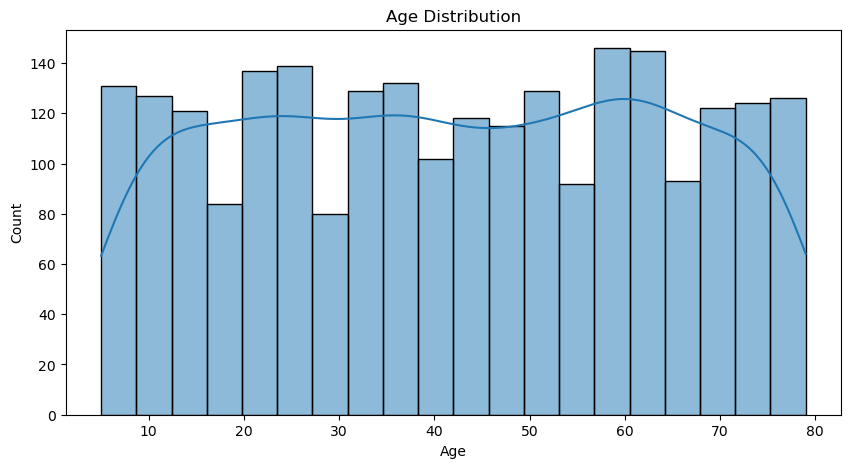

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
# Age Distribution (Histogram and Pie chart)
plt.figure(figsize=(10, 5))
sns.histplot(asthma_data['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()




C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


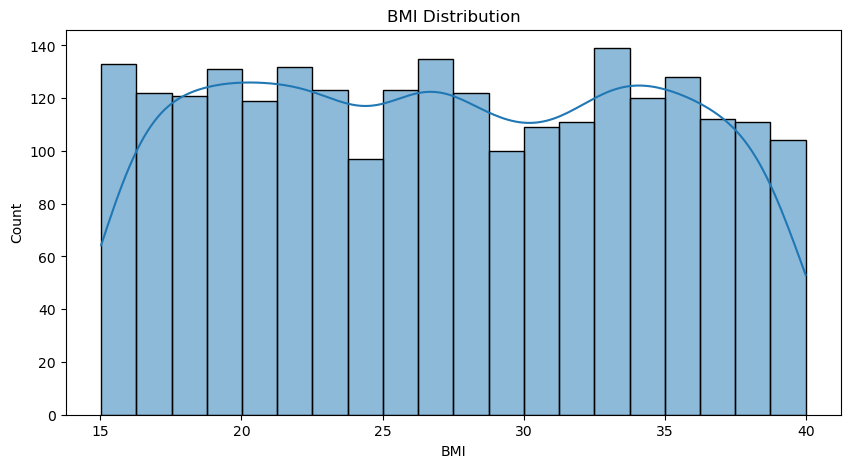

In [101]:
# BMI Distribution (Histogram)
plt.figure(figsize=(10, 5))
sns.histplot(asthma_data['BMI'], bins=20, kde=True)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()




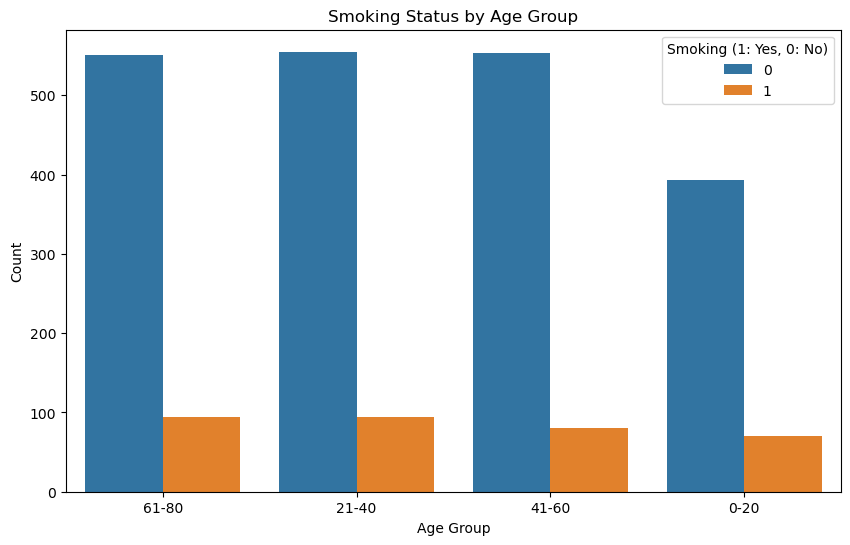

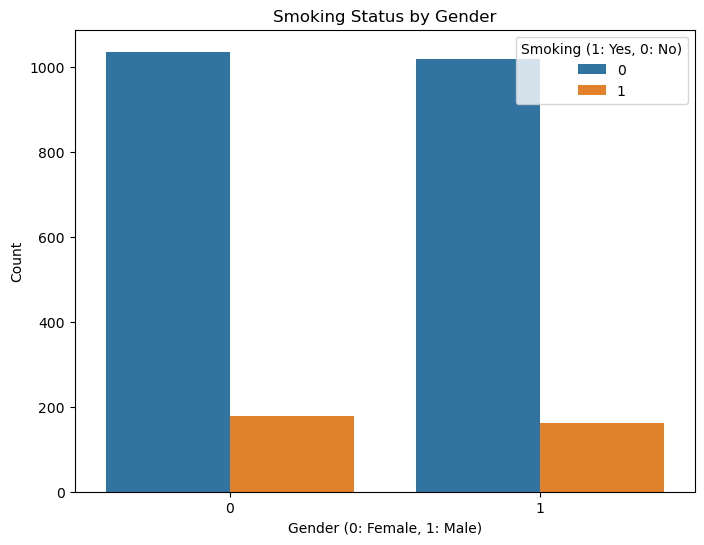

In [102]:
age_bins = [0, 20, 40, 60, 80, 100]
age_labels = ['0-20', '21-40', '41-60', '61-80', '81+']

# Creating a new AgeGroup column in the dataset
asthma_data['AgeGroup'] = pd.cut(asthma_data['Age'], bins=age_bins, labels=age_labels, right=False)

asthma_data['Smoking'] = asthma_data['Smoking'].astype(str)
asthma_data['AgeGroup'] = asthma_data['AgeGroup'].astype(str)


# Smoking by Age Group (Count Plot)
plt.figure(figsize=(10, 6))
sns.countplot(x='AgeGroup', hue='Smoking', data=asthma_data)
plt.title('Smoking Status by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Smoking (1: Yes, 0: No)')
plt.show()

# Smoking by Gender (Count Plot)
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Smoking', data=asthma_data)
plt.title('Smoking Status by Gender')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Count')
plt.legend(title='Smoking (1: Yes, 0: No)')
plt.show()



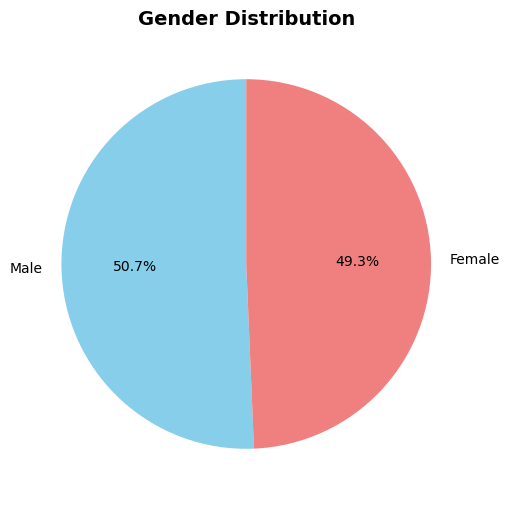

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
gender_counts = asthma_data['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=['Male', 'Female'], autopct='%1.1f%%', startangle=90, colors=["skyblue", "lightcoral"])
plt.title('Gender Distribution', fontsize=14, weight='bold')
plt.show()

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


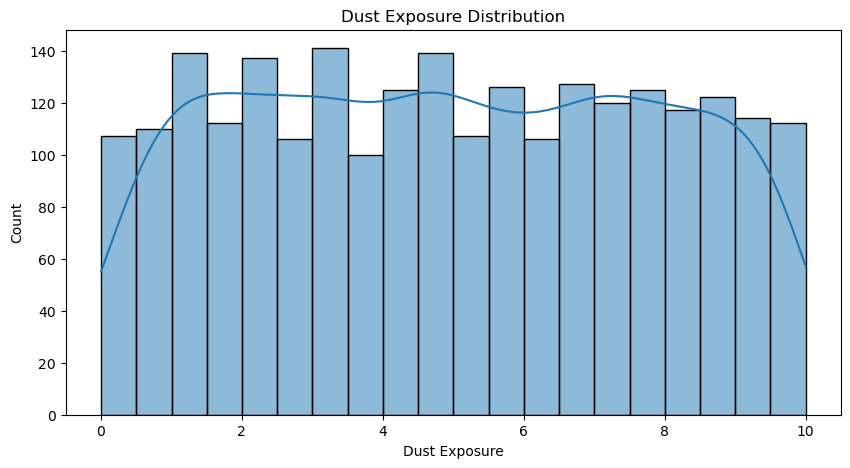

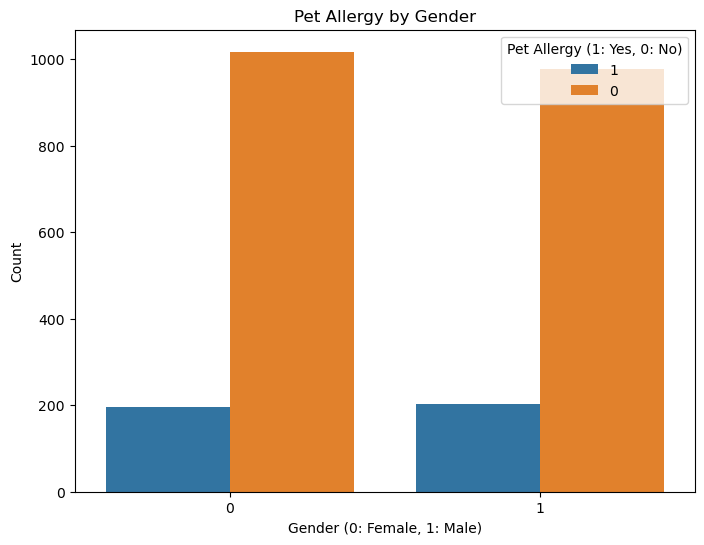

In [104]:
asthma_data['Gender'] = asthma_data['Gender'].astype(str)
asthma_data['PetAllergy'] = asthma_data['PetAllergy'].astype(str)
# Dust Exposure Distribution (Histogram)
plt.figure(figsize=(10, 5))
sns.histplot(asthma_data['DustExposure'], bins=20, kde=True)
plt.title('Dust Exposure Distribution')
plt.xlabel('Dust Exposure')
plt.ylabel('Count')
plt.show()

# Pet Allergy by Gender (Count Plot)
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='PetAllergy', data=asthma_data)
plt.title('Pet Allergy by Gender')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Count')
plt.legend(title='Pet Allergy (1: Yes, 0: No)')
plt.show()



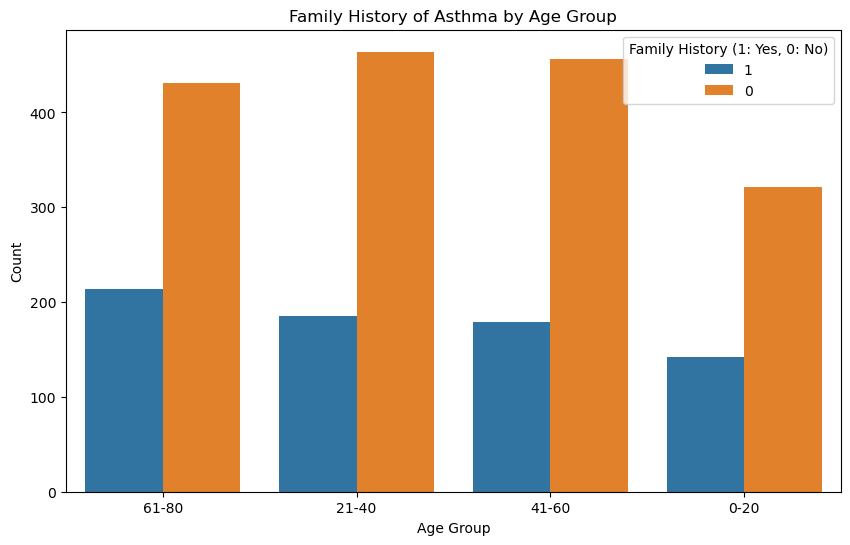

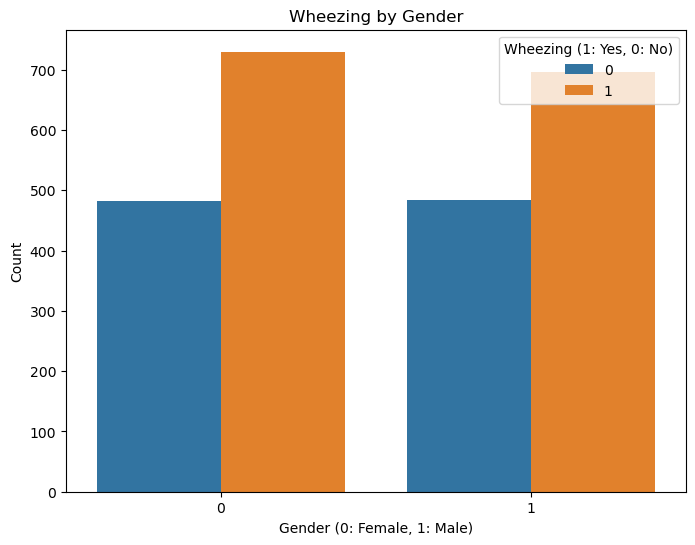

In [105]:
#  Family History of Asthma by Age Group (Count Plot)
asthma_data['FamilyHistoryAsthma'] = asthma_data['FamilyHistoryAsthma'].astype(str)
asthma_data['Wheezing'] = asthma_data['Wheezing'].astype(str)

plt.figure(figsize=(10, 6))
sns.countplot(x='AgeGroup', hue='FamilyHistoryAsthma', data=asthma_data)
plt.title('Family History of Asthma by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Family History (1: Yes, 0: No)')
plt.show()

#  Wheezing by Gender (Count Plot)
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Wheezing', data=asthma_data)
plt.title('Wheezing by Gender')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Count')
plt.legend(title='Wheezing (1: Yes, 0: No)')
plt.show()



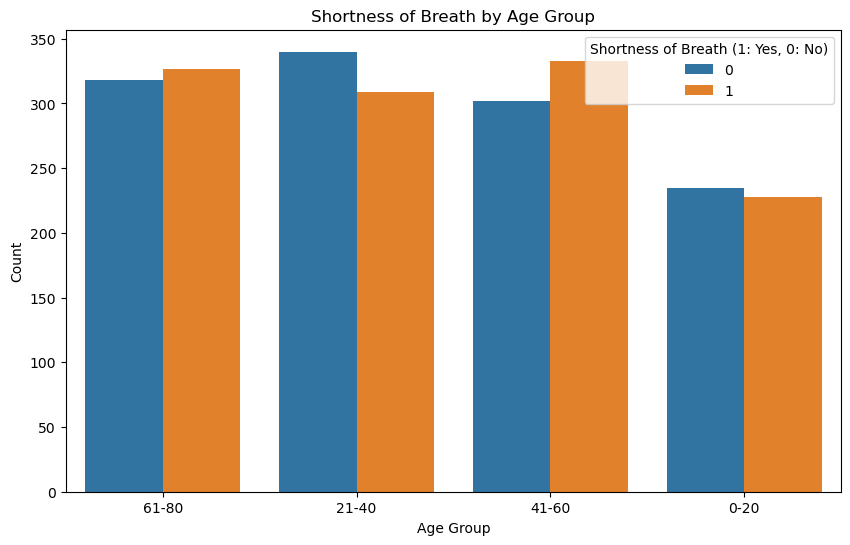

In [106]:
asthma_data['ShortnessOfBreath'] = asthma_data['ShortnessOfBreath'].astype(str)
asthma_data['PollutionExposure'] = asthma_data['PollutionExposure'].astype(str)

#  Shortness of Breath by Age Group (Count Plot)
plt.figure(figsize=(10, 6))
sns.countplot(x='AgeGroup', hue='ShortnessOfBreath', data=asthma_data)
plt.title('Shortness of Breath by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Shortness of Breath (1: Yes, 0: No)')
plt.show()






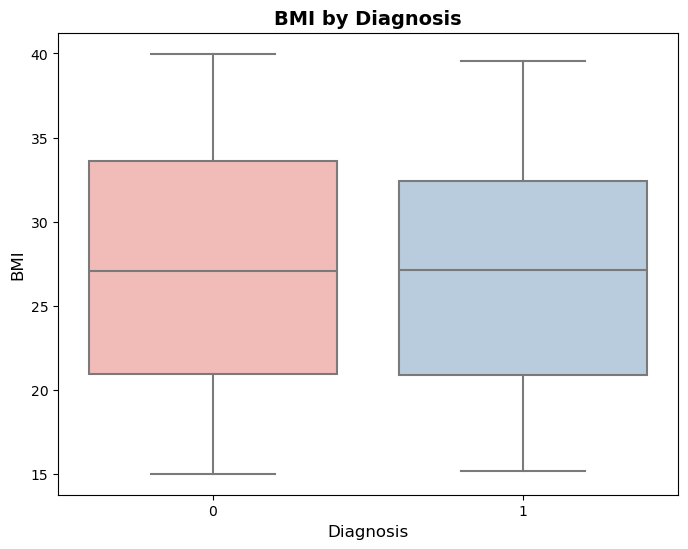

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
#Boxplot of BMI by Diagnosis
plt.figure(figsize=(8, 6))
sns.boxplot(data=asthma_data, x='Diagnosis', y='BMI', palette="Pastel1")
plt.title('BMI by Diagnosis', fontsize=14, weight='bold')
plt.xlabel('Diagnosis', fontsize=12)
plt.ylabel('BMI', fontsize=12)
plt.show()

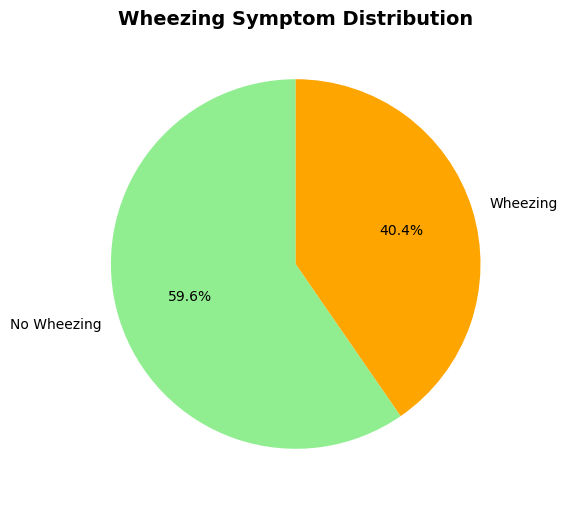

In [108]:
#Pie Chart for Wheezing Symptom Presence
wheezing_counts = asthma_data['Wheezing'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(wheezing_counts, labels=['No Wheezing', 'Wheezing'], autopct='%1.1f%%', startangle=90, colors=["lightgreen", "orange"])
plt.title('Wheezing Symptom Distribution', fontsize=14, weight='bold')
plt.show()

In [16]:
!pip install imbalanced-learn

## Step 3 : **Data Splitting and Resampling**

In [109]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_asthma, y_asthma = smote.fit_resample(X_asthma, y_asthma)

# Step 5: Split the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split # Importing the train_test_split function from sklearn.model_selection
X_train_asthma, X_test_asthma, y_train_asthma, y_test_asthma = train_test_split(X_asthma, y_asthma, test_size=0.2, random_state=48)

##  Step 5 : **Model Building and Evaluation**

### Model Algorithms : **Asthma Disease**

---





#### 1.   **Random Forest**




Train score =  0.9597574421168688
Test score =  0.9229074889867841
Confusion Matrix:
 [[397  47]
 [ 23 441]]
              precision    recall  f1-score     support
0              0.945238  0.894144  0.918981  444.000000
1              0.903689  0.950431  0.926471  464.000000
accuracy       0.922907  0.922907  0.922907    0.922907
macro avg      0.924463  0.922288  0.922726  908.000000
weighted avg   0.924006  0.922907  0.922809  908.000000


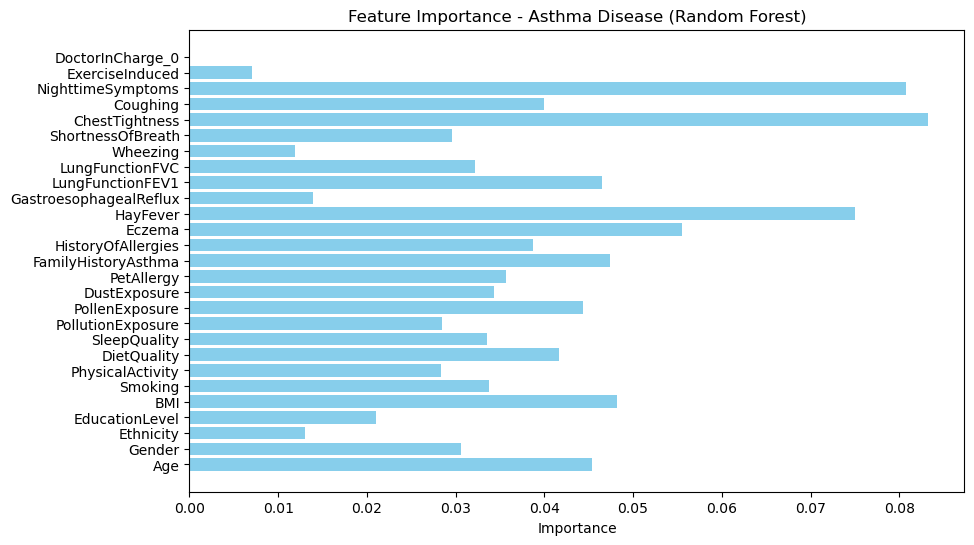

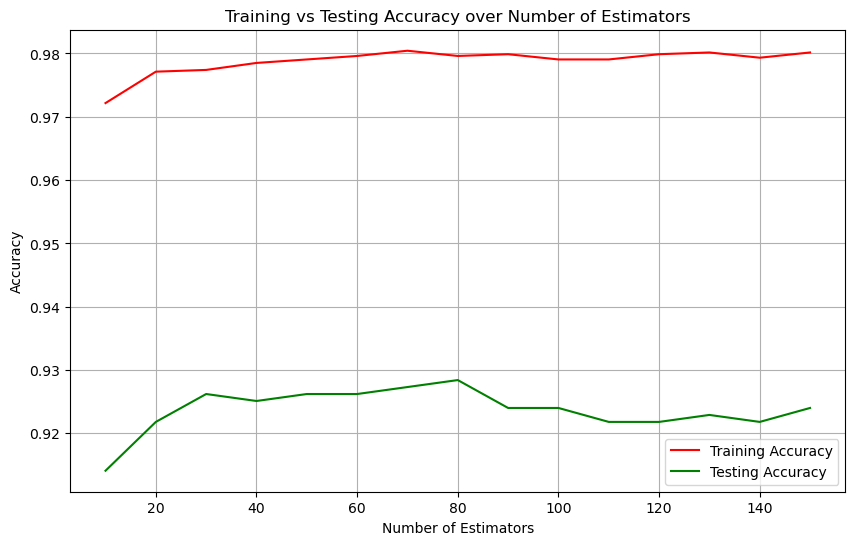

In [110]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



# Train the Random Forest Classifier
rf_asthma = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=10, min_samples_split=10, min_samples_leaf=5, max_features='sqrt', random_state=48)
rf_asthma.fit(X_train_asthma, y_train_asthma)

# Evaluate the Model
# Display training and test scores
print("Train score = ", rf_asthma.score(X_train_asthma, y_train_asthma))
print("Test score = ", rf_asthma.score(X_test_asthma, y_test_asthma))

# Predict and evaluate the model
y_pred_asthma = rf_asthma.predict(X_test_asthma)

# Confusion matrix and classification report
cm_asthma = confusion_matrix(y_test_asthma, y_pred_asthma)
print("Confusion Matrix:\n", cm_asthma)

cr_asthma = classification_report(y_test_asthma, y_pred_asthma, output_dict=True)
cr_df_asthma = pd.DataFrame(cr_asthma).transpose()

# Display classification report
print(cr_df_asthma)

# Plot the learning curve for Random Forest
#plot_learning_curve(rf_asthma, X_asthma, y_asthma, cv=5, n_jobs=-1)

# Feature Importance Plot
importances = rf_asthma.feature_importances_
features = X_asthma.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance - Asthma Disease (Random Forest)')
plt.show()

# Plot Training vs Testing Accuracy over Increasing Number of Estimators
train_accuracies = []
test_accuracies = []
estimators_range = range(10, 151, 10)

for n_estimators in estimators_range:
    rf_temp = RandomForestClassifier(n_estimators=n_estimators, criterion='entropy', max_depth=20, min_samples_split=10, min_samples_leaf=5, random_state=48)
    rf_temp.fit(X_train_asthma, y_train_asthma)
    train_accuracies.append(rf_temp.score(X_train_asthma, y_train_asthma))
    test_accuracies.append(rf_temp.score(X_test_asthma, y_test_asthma))

plt.figure(figsize=(10, 6))
plt.plot(estimators_range, train_accuracies, label='Training Accuracy', color='r')
plt.plot(estimators_range, test_accuracies, label='Testing Accuracy', color='g')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy over Number of Estimators')
plt.legend()
plt.grid()
plt.show()

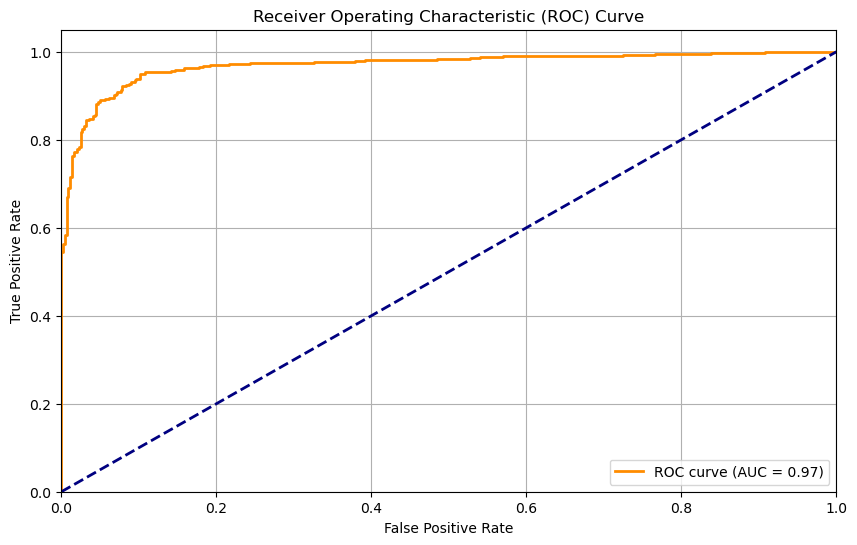

In [111]:
#Plot ROC Curve

from sklearn.metrics import roc_curve, auc 

y_pred_prob_asthma = rf_asthma.predict_proba(X_test_asthma)[:, 1]
fpr, tpr, _ = roc_curve(y_test_asthma, y_pred_prob_asthma)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()



In [ ]:
!pip install --upgrade scikit-learn xgboost

In [ ]:
pip install --upgrade xgboost



### 2.   **XGBoost**



#### Split data For XGBoost

In [20]:
!pip install xgboost

In [112]:
# Data Splitting and Resampling

from sklearn.model_selection import train_test_split

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_asthma, y_asthma)

# Split the resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [113]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train XGBoost with adjusted parameters
xgb_model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    max_depth=3,
    learning_rate=0.01,
    n_estimators=200,
    reg_alpha=0.1,
    reg_lambda=1
)

# Perform cross-validation
cv_scores = cross_val_score(xgb_model, X_train_scaled, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

# Fit the model
xgb_model.fit(X_train_scaled, y_train)

# Evaluate on test set
y_pred = xgb_model.predict(X_test_scaled)
print("Test score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))

# Feature Importance
feature_importance = xgb_model.feature_importances_
feature_importance_df = pd.DataFrame({'feature': X_asthma.columns, 'importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)
print(feature_importance_df)


C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:47:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:47:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:47:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Admin\anaconda3\Lib\site-packages\

Cross-validation scores: [0.85812672 0.8415978  0.85399449 0.87172414 0.88      ]
Mean CV score: 0.8610886292390996


C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:47:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test score: 0.8766519823788547

Confusion Matrix:
 [[414  65]
 [ 47 382]]

Classification Report:
               precision    recall  f1-score   support

           0     0.8980    0.8643    0.8809       479
           1     0.8546    0.8904    0.8721       429

    accuracy                         0.8767       908
   macro avg     0.8763    0.8774    0.8765       908
weighted avg     0.8775    0.8767    0.8767       908

                   feature  importance
24       NighttimeSymptoms    0.136732
22          ChestTightness    0.103936
16                HayFever    0.069207
15                  Eczema    0.067575
12              PetAllergy    0.064473
23                Coughing    0.063794
5                  Smoking    0.057937
13     FamilyHistoryAsthma    0.052463
17  GastroesophagealReflux    0.042791
21       ShortnessOfBreath    0.038505
1                   Gender    0.038401
14      HistoryOfAllergies    0.034739
20                Wheezing    0.032563
3           EducationLevel  

[[414  65]
 [ 47 382]]


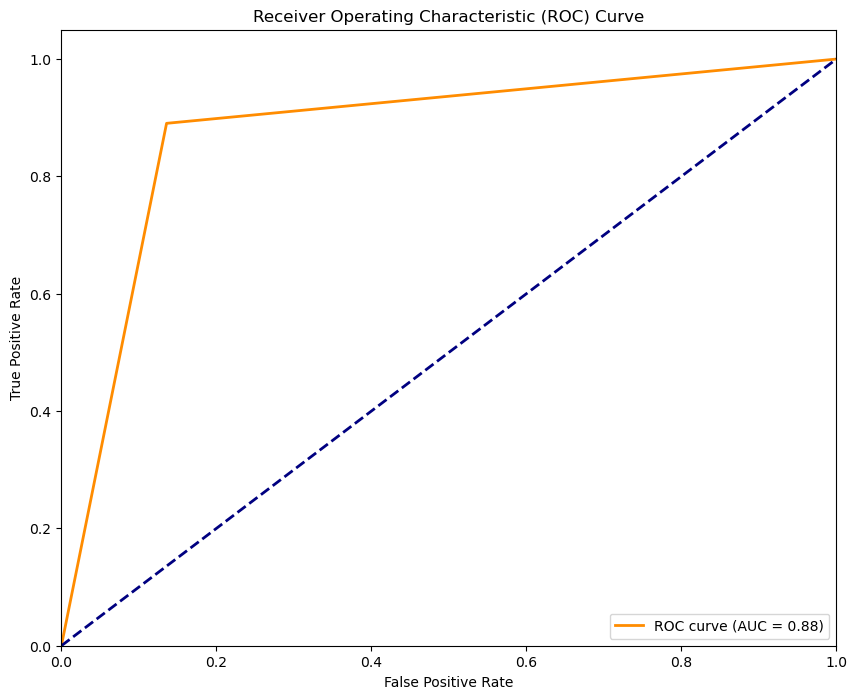

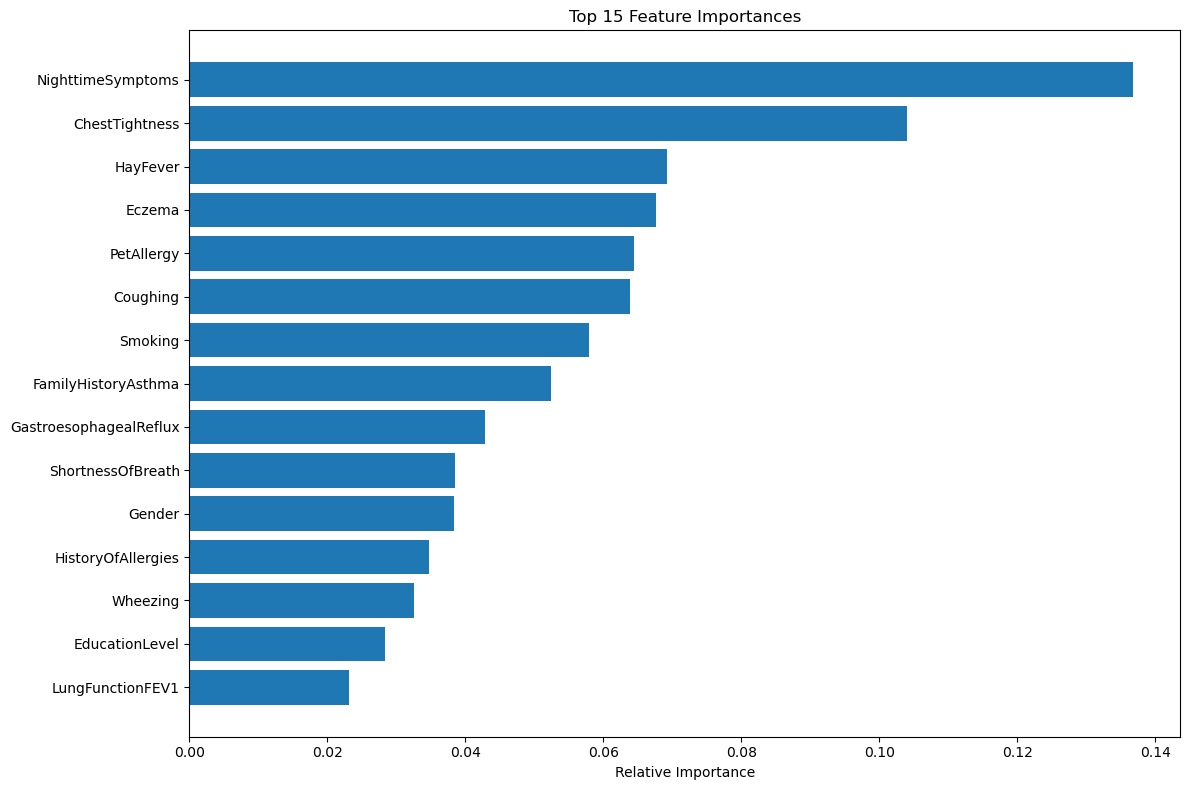

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import numpy as np

# Confusion Matrix 

conf_matrix_xgb = confusion_matrix(y_test, y_pred)
print(conf_matrix_xgb)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



#Feature Importance Plot
feature_importance = xgb_model.feature_importances_
feature_names = X_asthma.columns

# Sort features by importance
indices = np.argsort(feature_importance)
top_k = 15  # Show top 15 features

plt.figure(figsize=(12, 8))
plt.title(f"Top {top_k} Feature Importances")
plt.barh(range(top_k), feature_importance[indices][-top_k:], align="center")
plt.yticks(range(top_k), [feature_names[i] for i in indices][-top_k:])
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.show()





3.    **Neural Network**




In [24]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [115]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_asthma, y_asthma)

# Split the resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.4),
    Dense(16, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32,
                    validation_split=0.2, callbacks=[early_stopping, reduce_lr], verbose=1)

# Evaluate and print results
y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)
print("\nClassification Report:")
print(classification_report(y_test, y_pred,digits=4))

# Plot confusion matrix
conf_matrix_nn = confusion_matrix(y_test, y_pred)
print(conf_matrix_nn)

Epoch 1/50


C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5536 - loss: 0.8537 - val_accuracy: 0.7713 - val_loss: 0.5388 - learning_rate: 0.0010
Epoch 2/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6643 - loss: 0.6244 - val_accuracy: 0.8526 - val_loss: 0.4434 - learning_rate: 0.0010
Epoch 3/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7295 - loss: 0.5673 - val_accuracy: 0.8760 - val_loss: 0.3771 - learning_rate: 0.0010
Epoch 4/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7787 - loss: 0.4928 - val_accuracy: 0.8802 - val_loss: 0.3416 - learning_rate: 0.0010
Epoch 5/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8020 - loss: 0.4594 - val_accuracy: 0.8871 - val_loss: 0.3149 - learning_rate: 0.0010
Epoch 6/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7974 - loss: 0.4442 - val_accuracy: 0.8898 - val_loss: 0.3068 - learning_rate: 0.0010
Epoch 7/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8248 - loss: 0.4386 - val_accuracy: 0.8967 - va

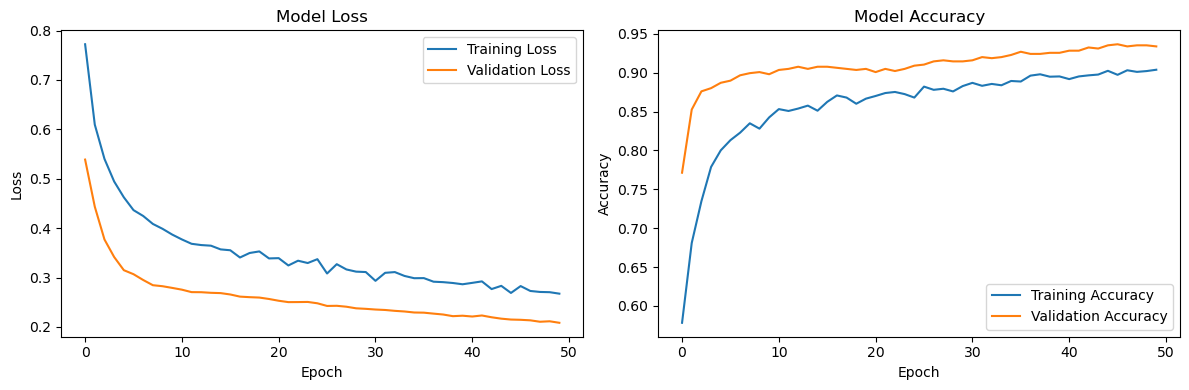

In [116]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


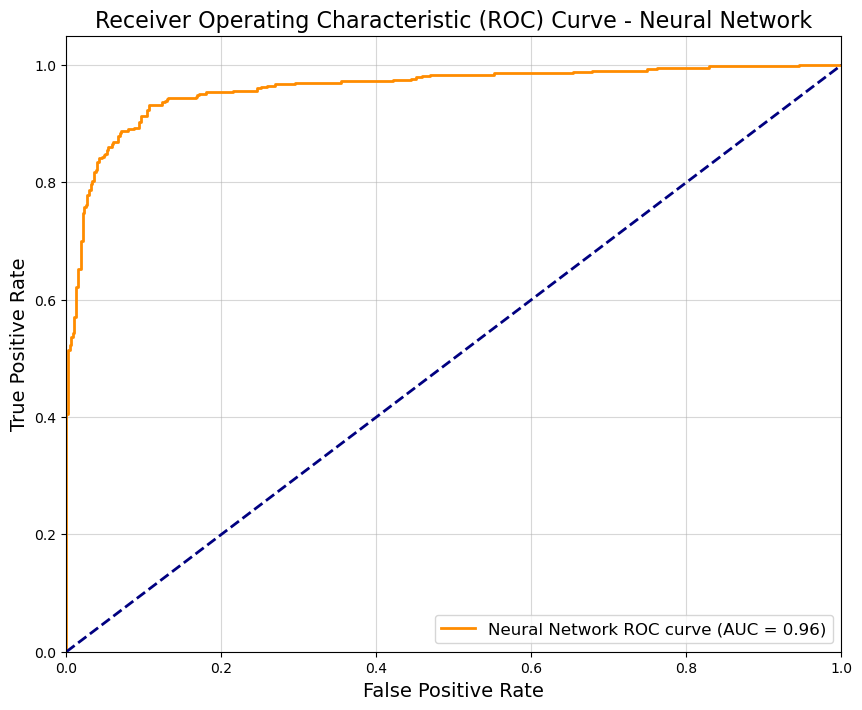

Neural Network AUC: 0.9608


In [117]:
#ROC curve NN

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities for the positive class (1) using the trained Neural Network
nn_probabilities = model.predict(X_test_scaled).ravel()  # Get probabilities (sigmoid outputs)

# Compute ROC curve and AUC for Neural Network
nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_probabilities)
nn_auc = roc_auc_score(y_test, nn_probabilities)

# Plot ROC Curve for Neural Network
plt.figure(figsize=(10, 8))
plt.plot(nn_fpr, nn_tpr, color='darkorange', lw=2, label=f'Neural Network ROC curve (AUC = {nn_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve - Neural Network', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.5)
plt.show()

# Print the AUC for Neural Network
print(f"Neural Network AUC: {nn_auc:.4f}")


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


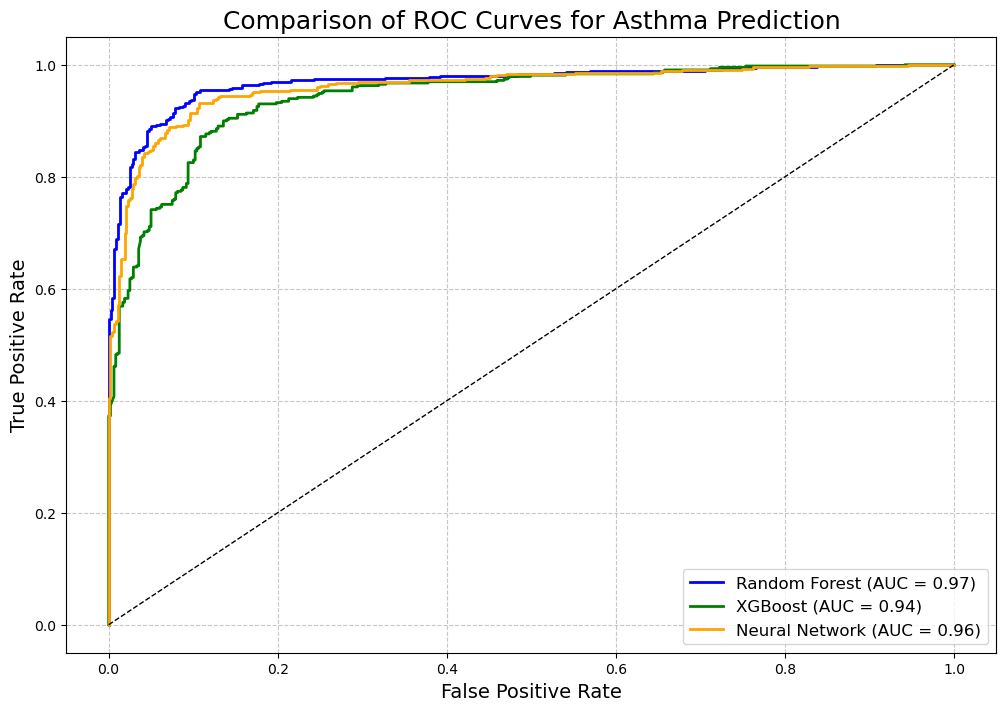

Random Forest AUC: 0.9697
XGBoost AUC: 0.9427
Neural Network AUC: 0.9608


In [118]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC for Random Forest
rf_probabilities = rf_asthma.predict_proba(X_test_asthma)[:, 1]  # Get probabilities for the positive class
rf_fpr, rf_tpr, _ = roc_curve(y_test_asthma, rf_probabilities)
rf_auc = roc_auc_score(y_test_asthma, rf_probabilities)

# Calculate ROC for XGBoost
xgb_probabilities = xgb_model.predict_proba(X_test_scaled)[:, 1]  # Get probabilities for the positive class
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probabilities)
xgb_auc = roc_auc_score(y_test, xgb_probabilities)

# Calculate ROC for Neural Network
nn_probabilities = model.predict(X_test_scaled).ravel()  # Get probabilities (sigmoid outputs)
nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_probabilities)
nn_auc = roc_auc_score(y_test, nn_probabilities)

# Plot ROC Curves
plt.figure(figsize=(12, 8))
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_auc:.2f})", linestyle='-', linewidth=2, color='blue')
plt.plot(xgb_fpr, xgb_tpr, label=f"XGBoost (AUC = {xgb_auc:.2f})", linestyle='-', linewidth=2, color='green')
plt.plot(nn_fpr, nn_tpr, label=f"Neural Network (AUC = {nn_auc:.2f})", linestyle='-', linewidth=2, color='orange')

# Add diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--', lw=1)

# Add labels, legend, and title
plt.title('Comparison of ROC Curves for Asthma Prediction', fontsize=18)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Save the plot if needed
plt.savefig('roc_comparison.png', dpi=300)

# Show the plot
plt.show()

# Print AUC scores for clarity
print(f"Random Forest AUC: {rf_auc:.4f}")
print(f"XGBoost AUC: {xgb_auc:.4f}")
print(f"Neural Network AUC: {nn_auc:.4f}")


# **Diabetes**






## **Preprocessing**

In [71]:
# Diabetes Disease

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Connect to drive
#from google.colab import drive
#drive.mount('/content/drive')

# Load the dataset
diabetes_data = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')


diabetes_data.head()



,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [72]:
diabetes_data.shape

(70692, 22)

In [73]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [74]:
diabetes_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,70692.0,0.500000,0.500004,0.0,0.0,0.5,1.0,1.0
HighBP,70692.0,0.563458,0.495960,0.0,0.0,1.0,1.0,1.0
HighChol,70692.0,0.525703,0.499342,0.0,0.0,1.0,1.0,1.0
CholCheck,70692.0,0.975259,0.155336,0.0,1.0,1.0,1.0,1.0
BMI,70692.0,29.856985,7.113954,12.0,25.0,29.0,33.0,98.0
Smoker,70692.0,0.475273,0.499392,0.0,0.0,0.0,1.0,1.0
Stroke,70692.0,0.062171,0.241468,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,70692.0,0.147810,0.354914,0.0,0.0,0.0,0.0,1.0
PhysActivity,70692.0,0.703036,0.456924,0.0,0.0,1.0,1.0,1.0
Fruits,70692.0,0.611795,0.487345,0.0,0.0,1.0,1.0,1.0


In [75]:
diabetes_data.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [76]:
diabetes_data.duplicated().sum()

1635

In [77]:
diabetes_data.drop_duplicates(inplace=True)

In [78]:
for col in diabetes_data.columns:
  print(f"{col} : {diabetes_data[col].value_counts()}\n")

Diabetes_binary : Diabetes_binary
1.0    35097
0.0    33960
Name: count, dtype: int64

HighBP : HighBP
1.0    39447
0.0    29610
Name: count, dtype: int64

HighChol : HighChol
1.0    36692
0.0    32365
Name: count, dtype: int64

CholCheck : CholCheck
1.0    67317
0.0     1740
Name: count, dtype: int64

BMI : BMI
27.0    6118
26.0    4801
28.0    4452
30.0    4282
24.0    4168
        ... 
85.0       1
83.0       1
80.0       1
78.0       1
74.0       1
Name: count, Length: 80, dtype: int64

Smoker : Smoker
0.0    35776
1.0    33281
Name: count, dtype: int64

Stroke : Stroke
0.0    64662
1.0     4395
Name: count, dtype: int64

HeartDiseaseorAttack : HeartDiseaseorAttack
0.0    58638
1.0    10419
Name: count, dtype: int64

PhysActivity : PhysActivity
1.0    48097
0.0    20960
Name: count, dtype: int64

Fruits : Fruits
1.0    41825
0.0    27232
Name: count, dtype: int64

Veggies : Veggies
1.0    54149
0.0    14908
Name: count, dtype: int64

HvyAlcoholConsump : HvyAlcoholConsump
0.0    660

In [79]:
# Feature Engineering: Create interaction terms
diabetes_data['HighBP_HighChol'] = diabetes_data['HighBP'] * diabetes_data['HighChol']
diabetes_data['BMI_PhysActivity'] = diabetes_data['BMI'] * diabetes_data['PhysActivity']

# Split features and target
X = diabetes_data.drop('Diabetes_binary', axis=1)
y = diabetes_data['Diabetes_binary']

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# **EDA**

---



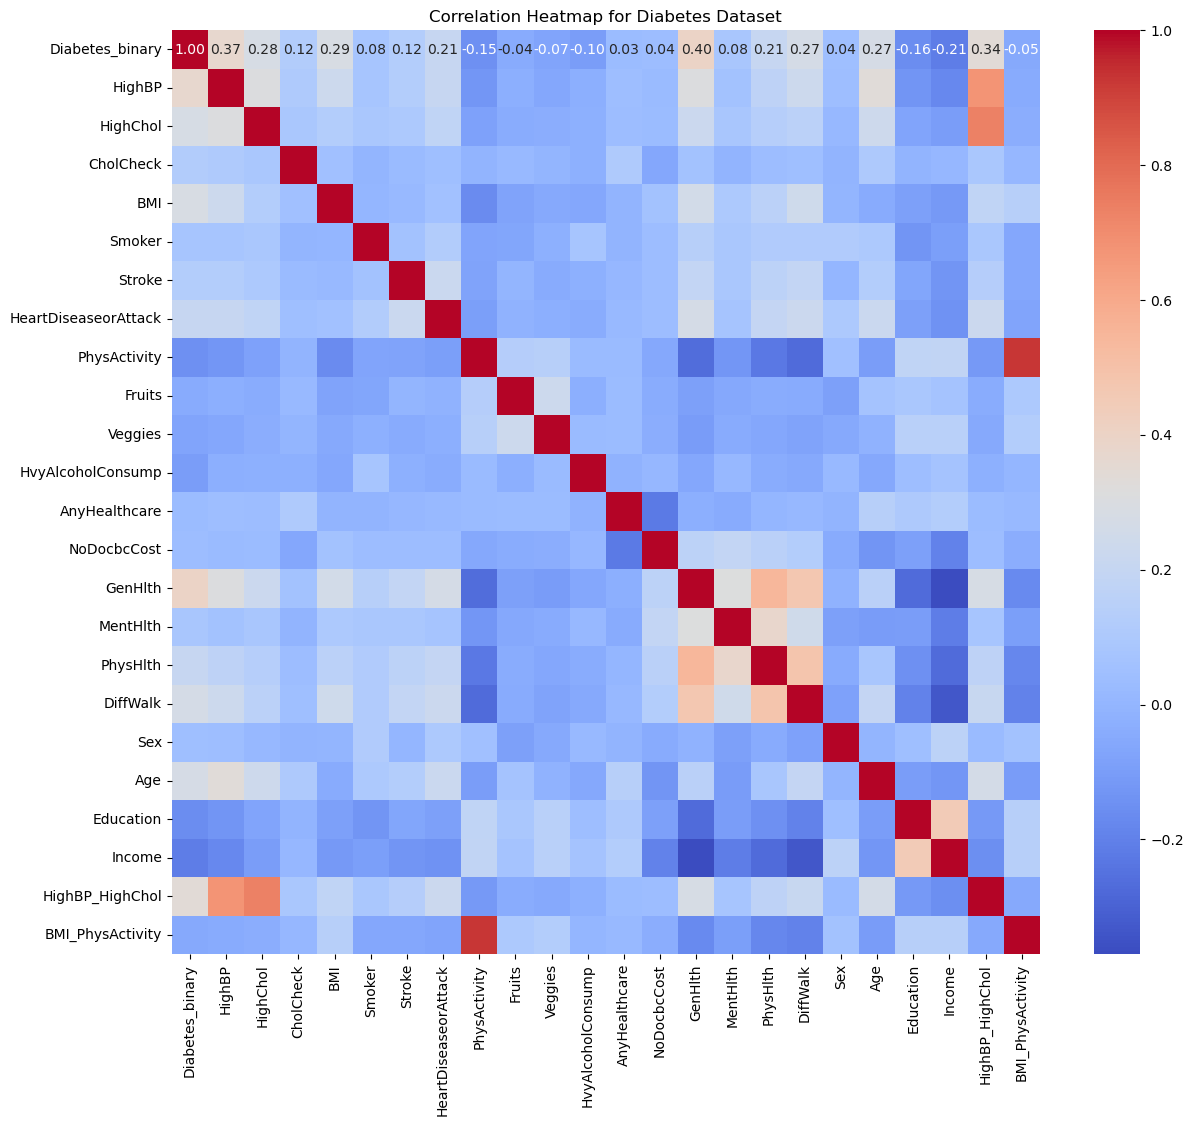

In [80]:
# Calculating the correlation matrix for the diabetes dataset
correlation_matrix = diabetes_data.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap for Diabetes Dataset")
plt.show()



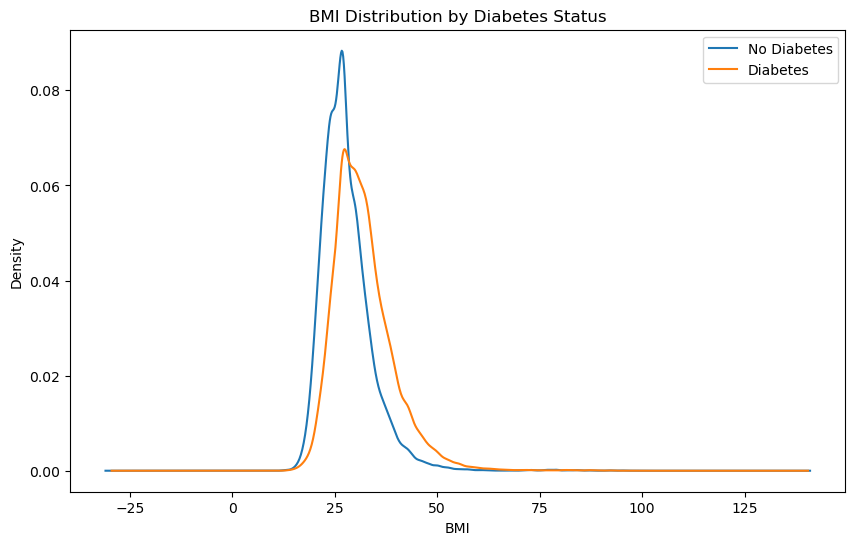

In [81]:
# BMI distribution among individuals with and without diabetes
plt.figure(figsize=(10, 6))
diabetes_data[diabetes_data['Diabetes_binary'] == 0]['BMI'].plot(kind='density', label='No Diabetes')
diabetes_data[diabetes_data['Diabetes_binary'] == 1]['BMI'].plot(kind='density', label='Diabetes')
plt.title("BMI Distribution by Diabetes Status")
plt.xlabel("BMI")
plt.legend()
plt.show()

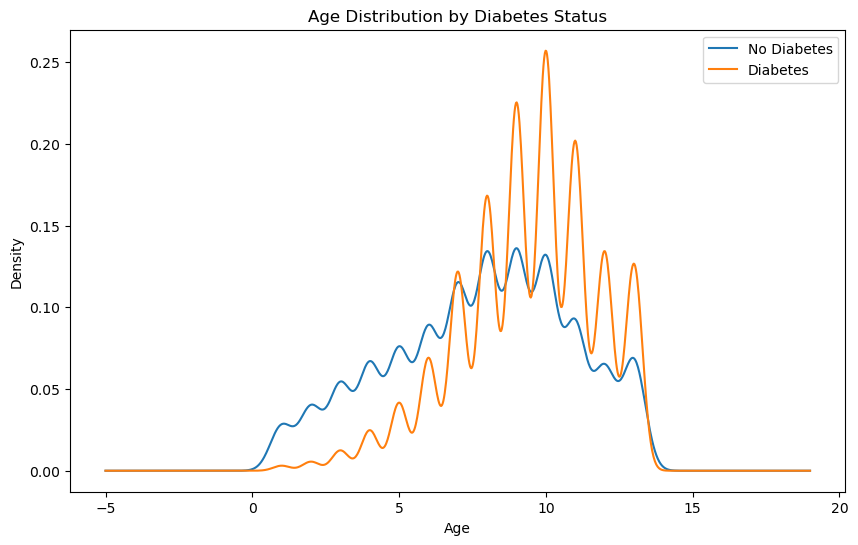

In [82]:
# Age distribution among individuals with and without diabetes
plt.figure(figsize=(10, 6))
diabetes_data[diabetes_data['Diabetes_binary'] == 0]['Age'].plot(kind='density', label='No Diabetes')
diabetes_data[diabetes_data['Diabetes_binary'] == 1]['Age'].plot(kind='density', label='Diabetes')
plt.title("Age Distribution by Diabetes Status")
plt.xlabel("Age")
plt.legend()
plt.show()

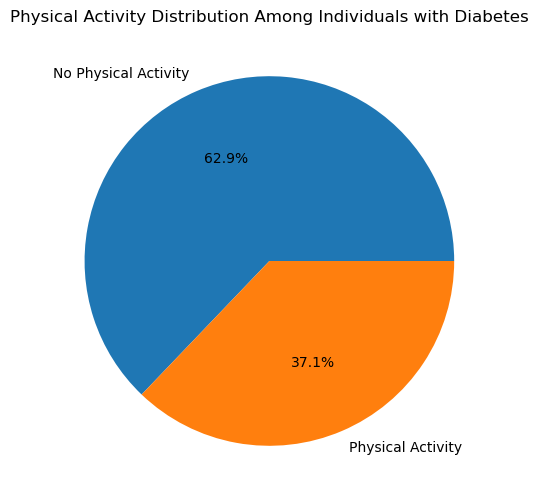

In [83]:
# Pie Chart: Distribution of Physical Activity among individuals with and without diabetes
plt.figure(figsize=(8, 6))
phys_activity_counts = diabetes_data[diabetes_data['Diabetes_binary'] == 1]['PhysActivity'].value_counts()
plt.pie(phys_activity_counts, labels=["No Physical Activity", "Physical Activity"], autopct='%1.1f%%')
plt.title("Physical Activity Distribution Among Individuals with Diabetes")
plt.show()

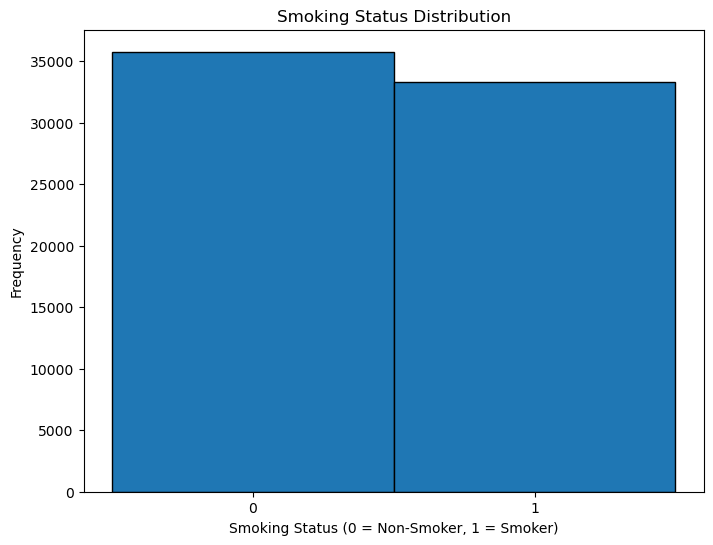

In [84]:
# Adjusting the histogram for Smoking Status to ensure proper x-axis values (0 and 1)

plt.figure(figsize=(8, 6))
plt.hist(diabetes_data['Smoker'], bins=[-0.5, 0.5, 1.5], edgecolor='black')
plt.title("Smoking Status Distribution")
plt.xlabel("Smoking Status (0 = Non-Smoker, 1 = Smoker)")
plt.xticks([0, 1])
plt.ylabel("Frequency")
plt.show()

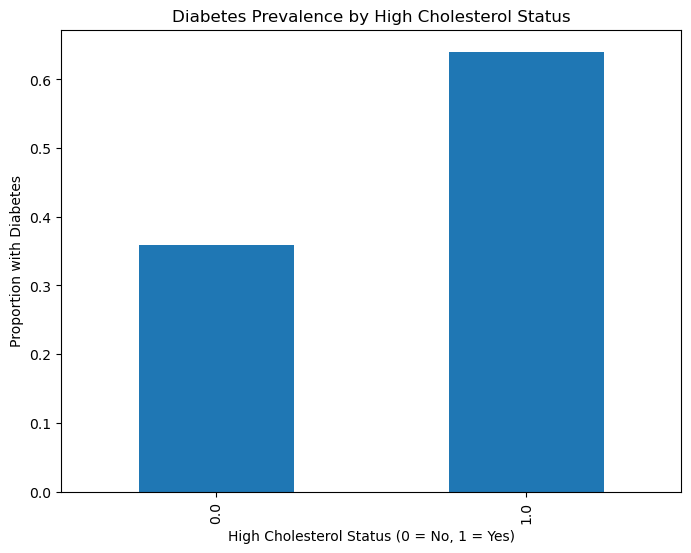

In [85]:
#Bar plot of High Cholesterol status (HighChol) and Diabetes_binary
plt.figure(figsize=(8, 6))
diabetes_data.groupby('HighChol')['Diabetes_binary'].mean().plot(kind='bar')
plt.title("Diabetes Prevalence by High Cholesterol Status")
plt.xlabel("High Cholesterol Status (0 = No, 1 = Yes)")
plt.ylabel("Proportion with Diabetes")
plt.show()

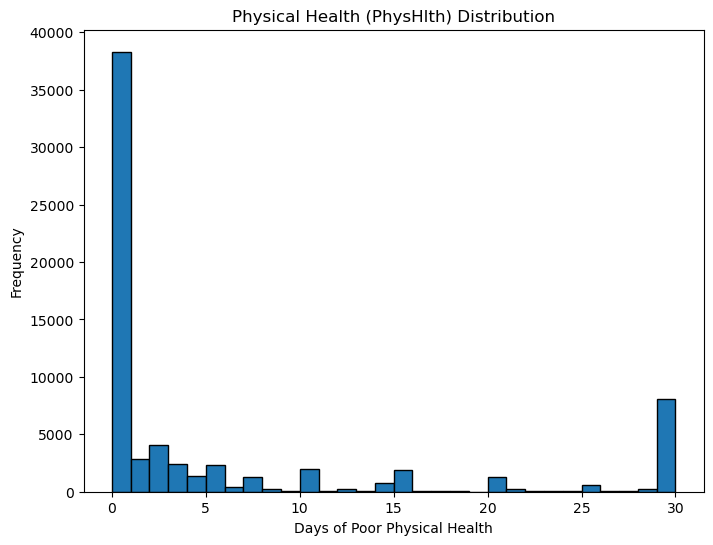

In [86]:
#Histogram of Physical Health (PhysHlth)
plt.figure(figsize=(8, 6))
plt.hist(diabetes_data['PhysHlth'], bins=30, edgecolor='black')
plt.title("Physical Health (PhysHlth) Distribution")
plt.xlabel("Days of Poor Physical Health")
plt.ylabel("Frequency")
plt.show()

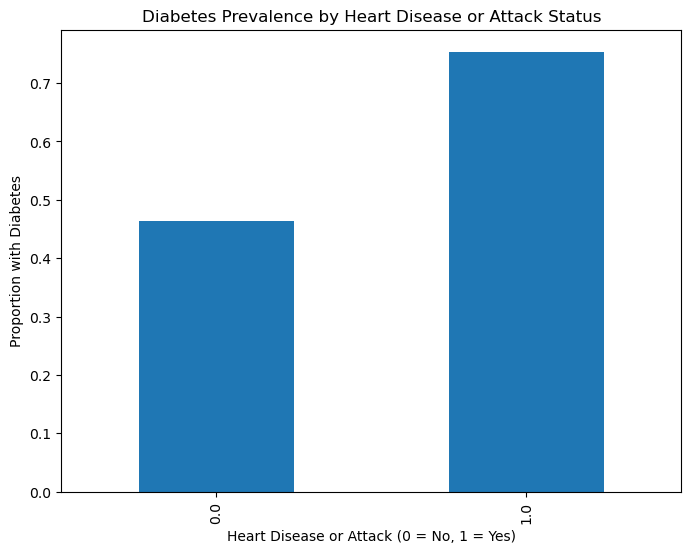

In [87]:
#Bar plot of Heart Disease or Attack status and Diabetes_binary
plt.figure(figsize=(8, 6))
diabetes_data.groupby('HeartDiseaseorAttack')['Diabetes_binary'].mean().plot(kind='bar')
plt.title("Diabetes Prevalence by Heart Disease or Attack Status")
plt.xlabel("Heart Disease or Attack (0 = No, 1 = Yes)")
plt.ylabel("Proportion with Diabetes")
plt.show()



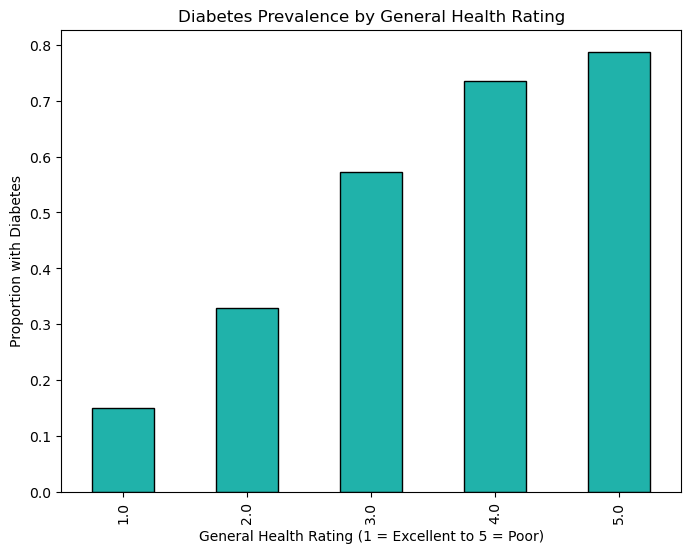

In [88]:
plt.figure(figsize=(8, 6))
diabetes_data.groupby('GenHlth')['Diabetes_binary'].mean().plot(kind='bar', color='lightseagreen', edgecolor='black')
plt.title("Diabetes Prevalence by General Health Rating")
plt.xlabel("General Health Rating (1 = Excellent to 5 = Poor)")
plt.ylabel("Proportion with Diabetes")
plt.show()

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

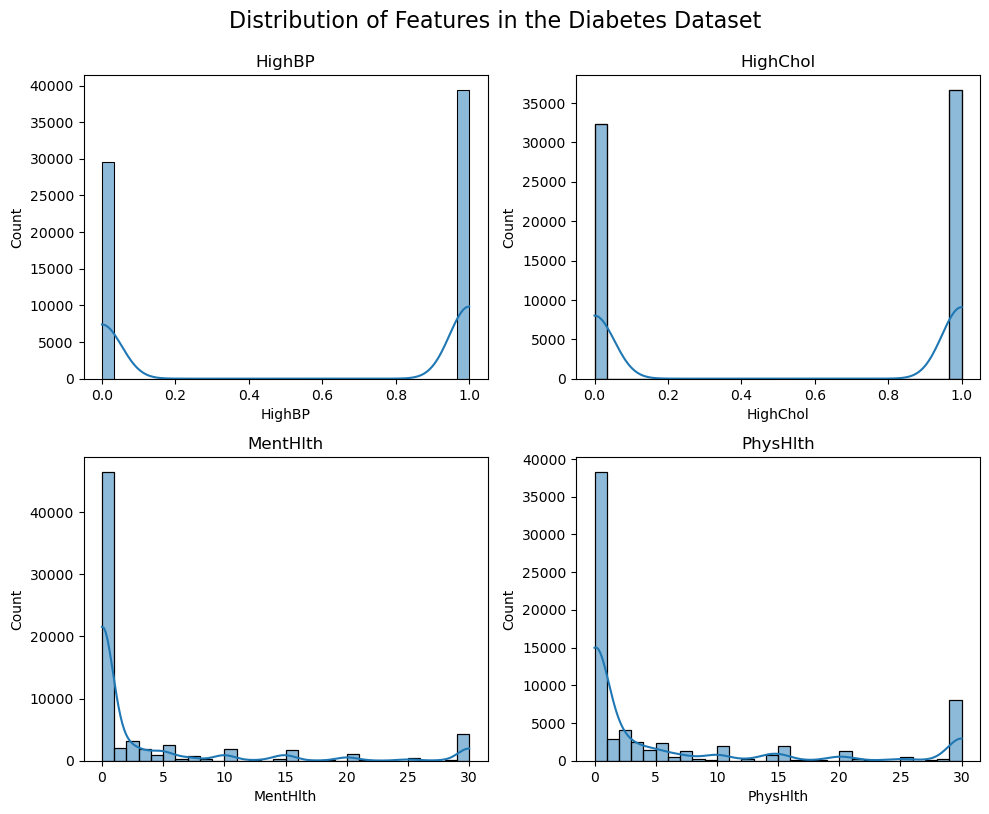

In [89]:
features = ["HighBP", "HighChol",
             "MentHlth", "PhysHlth"]

plt.figure(figsize=(10, 15))
for i, feature in enumerate(features, 1):
    plt.subplot(4, 2, i)
    sns.histplot(diabetes_data[feature], kde=True, bins=30)
    plt.title(feature)
    plt.tight_layout()

plt.suptitle("Distribution of Features in the Diabetes Dataset", y=1.02, fontsize=16)
plt.show()

# Model Algorithms : **Random Forest**
### **Data Splitting and Model Building**

---




Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0     0.7539    0.6983    0.7250      6996
         1.0     0.7207    0.7735    0.7462      7043

    accuracy                         0.7360     14039
   macro avg     0.7373    0.7359    0.7356     14039
weighted avg     0.7372    0.7360    0.7356     14039

[[4885 2111]
 [1595 5448]]


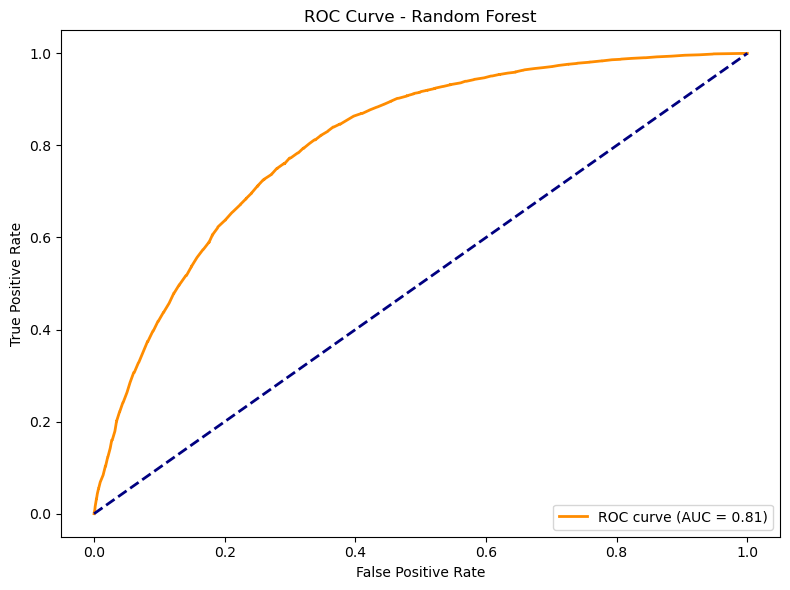


AUC Score: 0.81


In [90]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Split data for Random Forest
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scaling the features
scaler_rf = StandardScaler()
X_train_rf = scaler_rf.fit_transform(X_train_rf)
X_test_rf = scaler_rf.transform(X_test_rf)

# Define and fit Random Forest pipeline
pipeline_rf = Pipeline([
    ('pca', PCA(n_components=0.95)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
])

pipeline_rf.fit(X_train_rf, y_train_rf)

# Predictions and Evaluation
y_pred_rf = pipeline_rf.predict(X_test_rf)
y_pred_proba_rf = pipeline_rf.predict_proba(X_test_rf)[:, 1]

print("\nRandom Forest Classification Report:")
print(classification_report(y_test_rf, y_pred_rf,digits=4))

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test_rf, y_pred_rf)
print(conf_matrix_rf)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_rf, y_pred_proba_rf)
roc_auc_rf = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# Print AUC score
print(f"\nAUC Score: {roc_auc_rf:.2f}")



# Model Algorithms : **XGBoost**
### **Data Splitting and Model Building**

---





Fitting 5 folds for each of 144 candidates, totalling 720 fits


C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:36:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classification Report:
              precision    recall  f1-score   support

         0.0     0.7822    0.7218    0.7508      6996
         1.0     0.7434    0.8004    0.7708      7043

    accuracy                         0.7612     14039
   macro avg     0.7628    0.7611    0.7608     14039
weighted avg     0.7627    0.7612    0.7609     14039

[[5050 1946]
 [1406 5637]]


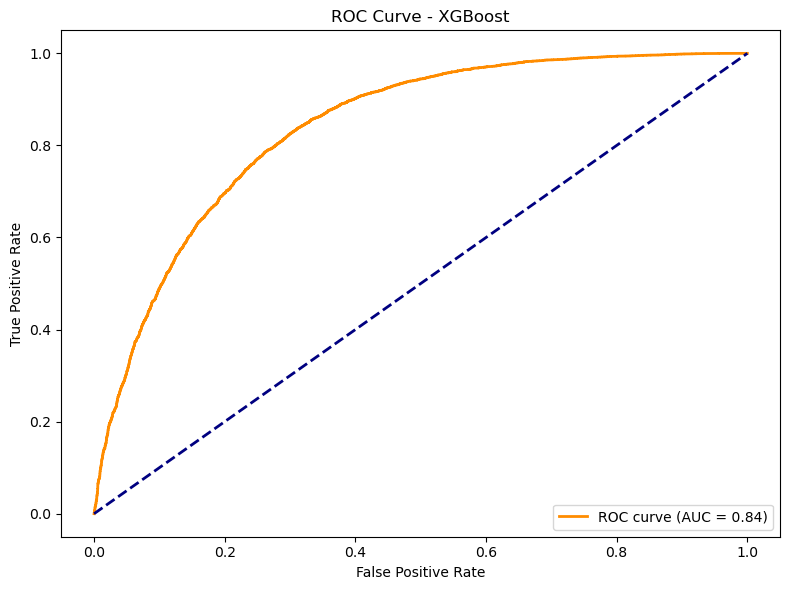


AUC Score: 0.84


In [91]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Split data for XGBoost
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scaling the features
scaler_xgb = StandardScaler()
X_train_xgb = scaler_xgb.fit_transform(X_train_xgb)
X_test_xgb = scaler_xgb.transform(X_test_xgb)

# Define XGBoost pipeline and parameter grid
pipeline_xgb = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

param_grid_xgb = {
    'xgb__max_depth': [3, 5, 7],
    'xgb__n_estimators': [100, 200, 300],
    'xgb__learning_rate': [0.01, 0.1],
    'xgb__subsample': [0.8, 1.0],
    'xgb__colsample_bytree': [0.8, 1.0],
    'xgb__gamma': [0, 0.1]
}

# Grid Search with StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb, cv=skf, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_search_xgb.fit(X_train_xgb, y_train_xgb)

# Best model predictions
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test_xgb)
y_pred_proba_xgb = best_xgb_model.predict_proba(X_test_xgb)[:, 1]

# Evaluation
print("XGBoost Classification Report:")
print(classification_report(y_test_xgb, y_pred_xgb,digits=4))

# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test_xgb, y_pred_xgb)
print(conf_matrix_xgb)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test_xgb, y_pred_proba_xgb)
roc_auc_xgb = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# Print AUC score
print(f"\nAUC Score: {roc_auc_xgb:.2f}")




# Model Algorithms : **Neural Network**



### Data Splitting and Model Building

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1404/1404 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7589 - accuracy: 0.6935 - loss: 1.0318
Epoch 1: val_loss improved from inf to 0.58881, saving model to best_model.keras
1404/1404 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - AUC: 0.7589 - accuracy: 0.6935 - loss: 1.0316 - val_AUC: 0.8086 - val_accuracy: 0.7315 - val_loss: 0.5888 - learning_rate: 0.0010
Epoch 2/50
1396/1404 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.8067 - accuracy: 0.7350 - loss: 0.5696
Epoch 2: val_loss improved from 0.58881 to 0.54537, saving model to best_model.keras
1404/1404 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - AUC: 0.8067 - accuracy: 0.7351 - loss: 0.5695 - val_AUC: 0.8097 - val_accuracy: 0.7373 - val_loss: 0.5454 - learning_rate: 0.0010
Epoch 3/50
1397/1404 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.8106 - accuracy: 0.7372 - loss: 0.5419
Epoch 3: val_loss improved from 0.54537 to 0.54149, saving model to best_model.keras
1404/1404 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - AUC: 0.8106 - accuracy: 0.7372 - loss: 0.5419 -

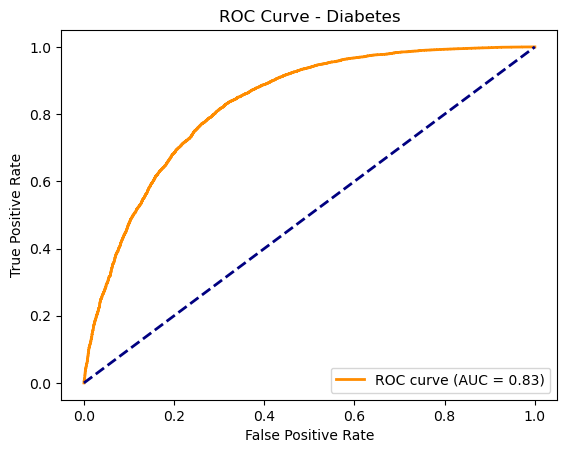

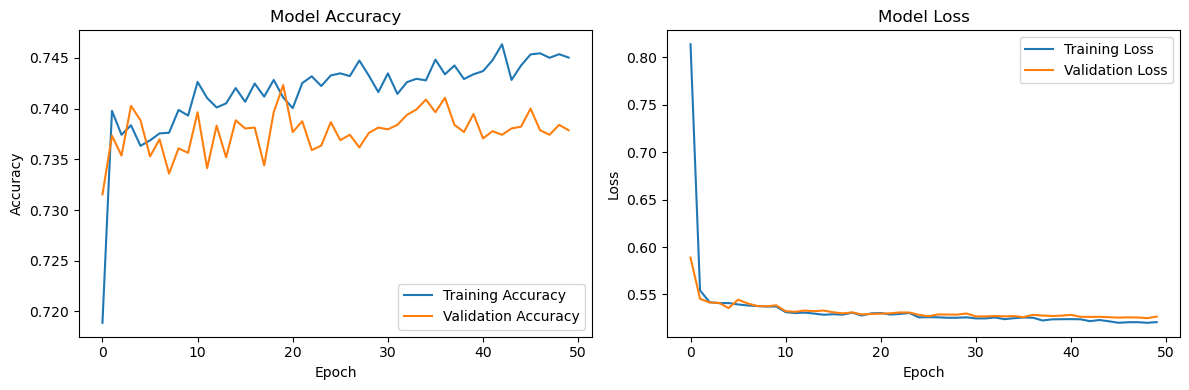

In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define and compile the model
from tensorflow.keras.regularizers import l2

model = Sequential([
    Dense(64, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)),
    BatchNormalization(),  # Add Batch Normalization
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),  # Add Batch Normalization
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Output layer
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy', 'AUC'])  # Added 'AUC' as a metric

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, verbose=1)

# Train the model
history_nn = model.fit(X_train_scaled, y_train,
                       epochs=50,
                       batch_size=32,
                       validation_split=0.2,
                       verbose=1,
                       callbacks=[early_stopping, lr_scheduler, checkpoint])

# Evaluate the model
y_pred_prob = model.predict(X_test_scaled)  # Predicted probabilities
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert to binary predictions

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred,digits=4))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Diabetes')
plt.legend(loc="lower right")
plt.show()

# Training History Visualization
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_nn.history['accuracy'], label='Training Accuracy')
plt.plot(history_nn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_nn.history['loss'], label='Training Loss')
plt.plot(history_nn.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


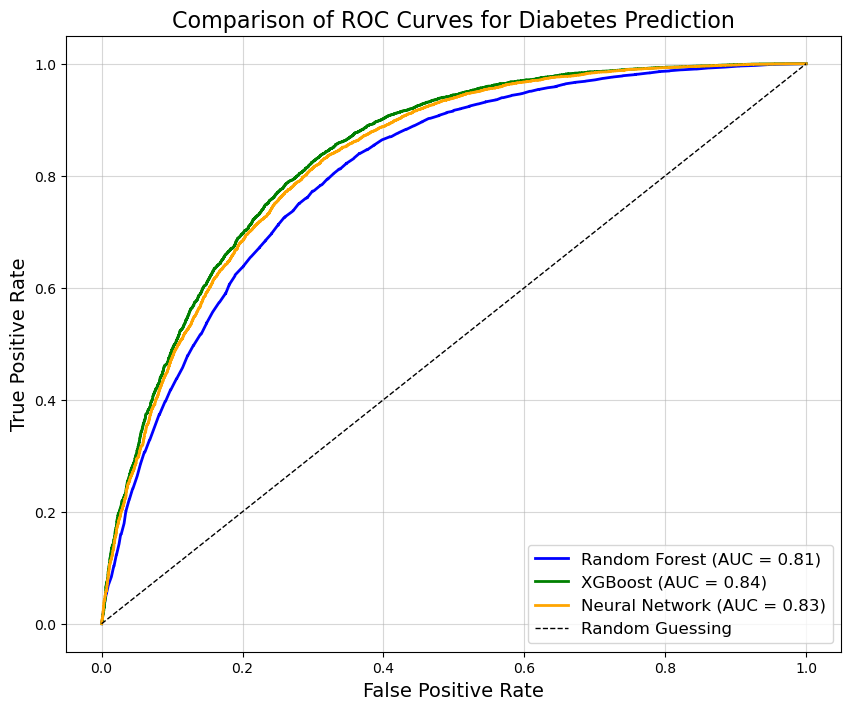

Random Forest AUC: 0.8068
XGBoost AUC: 0.8380
Neural Network AUC: 0.8305


In [93]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Random Forest: ROC and AUC
fpr_rf, tpr_rf, _ = roc_curve(y_test_rf, y_pred_proba_rf)  # Use predicted probabilities for Random Forest
roc_auc_rf = auc(fpr_rf, tpr_rf)

# XGBoost: ROC and AUC
fpr_xgb, tpr_xgb, _ = roc_curve(y_test_xgb, y_pred_proba_xgb)  # Use predicted probabilities for XGBoost
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Neural Network: ROC and AUC
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_prob)  # Use predicted probabilities for Neural Network
roc_auc_nn = auc(fpr_nn, tpr_nn)

# Plot the ROC Curves
plt.figure(figsize=(10, 8))

# Random Forest
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})", lw=2, color='blue')

# XGBoost
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {roc_auc_xgb:.2f})", lw=2, color='green')

# Neural Network
plt.plot(fpr_nn, tpr_nn, label=f"Neural Network (AUC = {roc_auc_nn:.2f})", lw=2, color='orange')

# Reference diagonal line
plt.plot([0, 1], [0, 1], 'k--', lw=1, label="Random Guessing")

# Add labels, legend, and title
plt.title('Comparison of ROC Curves for Diabetes Prediction', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.5)

# Show the plot
plt.show()

# Print AUC scores for all models
print(f"Random Forest AUC: {roc_auc_rf:.4f}")
print(f"XGBoost AUC: {roc_auc_xgb:.4f}")
print(f"Neural Network AUC: {roc_auc_nn:.4f}")


# **Brain Stroke**

## **Preprocessing**

In [52]:
# Preprocessing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

#from google.colab import drive
#drive.mount('/content/drive')

# Load the dataset
data = pd.read_csv('brain_stroke.csv')

# Check for null values and duplicates
print(data.isnull().sum())
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
data = data.drop_duplicates()

# Outlier Removal Function using IQR
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Define columns for outlier removal
numerical_columns = ['age', 'avg_glucose_level', 'bmi']
data = remove_outliers(data, numerical_columns)

# Encode categorical variables
le = LabelEncoder()
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

# Separate features and target
X = data.drop('stroke', axis=1)
y = data['stroke']

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64
Number of duplicate rows: 0


In [53]:
# Get the shape of the dataset (number of rows and columns)
data.shape




(4337, 11)

In [68]:
data.nunique()


gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               4
Residence_type          2
avg_glucose_level    3290
bmi                   311
smoking_status          4
stroke                  2
dtype: int64

In [54]:
data.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
gender,4337.0,0.410191,0.491925,0.00,0.00,0.0,1.0,1.00
age,4337.0,41.134351,22.500390,0.08,23.00,42.0,58.0,82.00
hypertension,4337.0,0.074937,0.263319,0.00,0.00,0.0,0.0,1.00
heart_disease,4337.0,0.039659,0.195179,0.00,0.00,0.0,0.0,1.00
ever_married,4337.0,0.627392,0.483555,0.00,0.00,1.0,1.0,1.00
work_type,4337.0,1.329490,0.882925,0.00,1.00,1.0,2.0,3.00
Residence_type,4337.0,0.506341,0.500017,0.00,0.00,1.0,1.0,1.00
avg_glucose_level,4337.0,91.450980,22.596456,55.12,75.08,88.1,104.0,168.68
bmi,4337.0,27.795481,6.455108,14.00,23.20,27.6,31.9,45.20
smoking_status,4337.0,1.348398,1.084588,0.00,0.00,2.0,2.0,3.00


## EDA

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


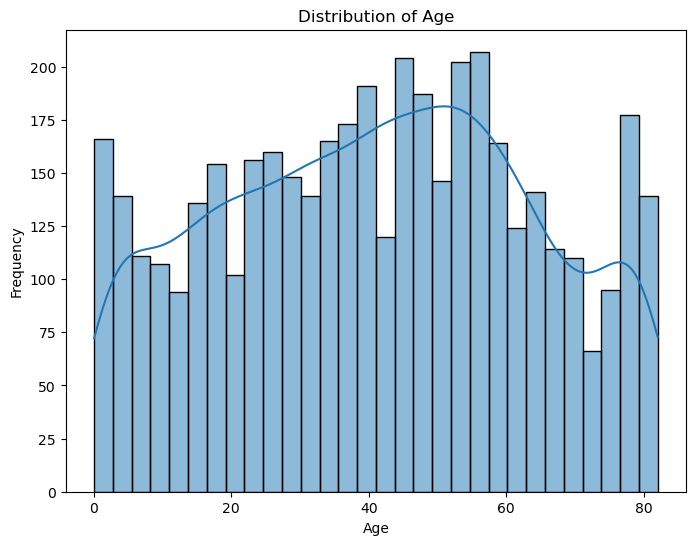

In [55]:
# 1. Distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(data['age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()




C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

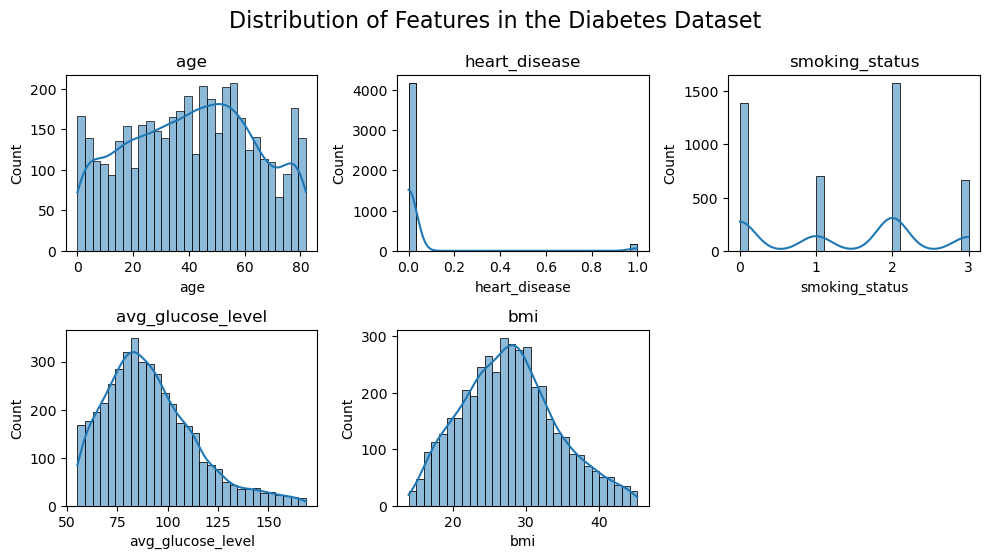

In [56]:
features = [ "age","heart_disease","smoking_status","avg_glucose_level", "bmi"]

plt.figure(figsize=(10, 15))
for i, feature in enumerate(features, 1):
    plt.subplot(6, 3, i)
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(feature)
    plt.tight_layout()

plt.suptitle("Distribution of Features in the Diabetes Dataset", y=1.02, fontsize=16)
plt.show()

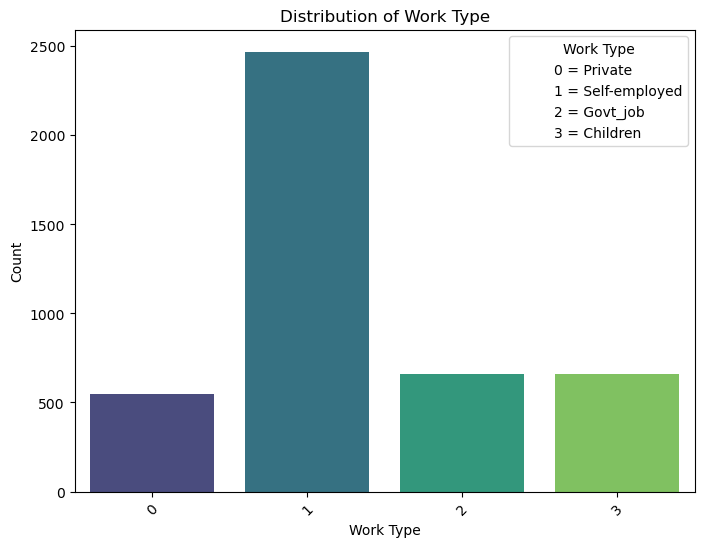

In [57]:
# Adding a legend that clarifies the encoding for 'work_type' using a mapped legend.
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='work_type', palette='viridis')

# Set title and axis labels
plt.title('Distribution of Work Type')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add legend with meaningful labels in the upper right
work_type_legend_labels = {
    "0": "Private",
    "1": "Self-employed",
    "2": "Govt_job",
    "3": "Children"
}
# Adding a proxy artist to create a custom legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'{k} = {v}', markersize=10)
                   for k, v in work_type_legend_labels.items()]
plt.legend(handles=legend_elements, title='Work Type', loc='upper right')

plt.show()

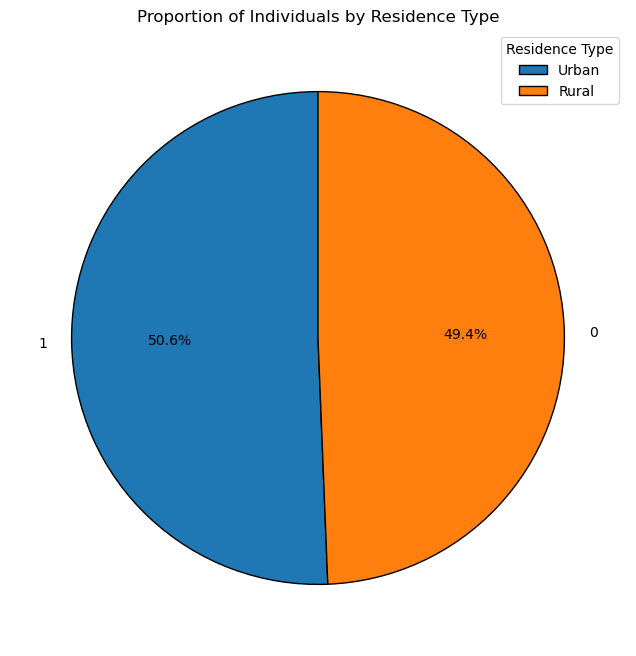

In [58]:
# Pie chart for Residence Type distribution
residence_counts = data['Residence_type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(residence_counts, labels=residence_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Proportion of Individuals by Residence Type')
plt.legend(title='Residence Type', labels=['Urban', 'Rural'])
plt.show()


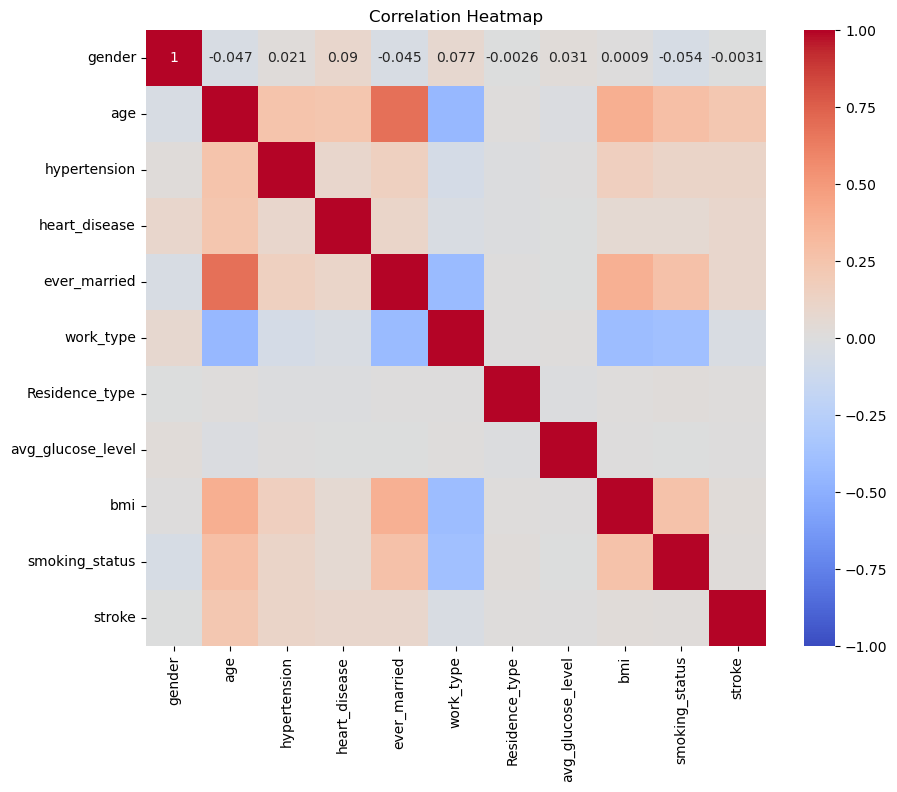

In [59]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix =data.corr(numeric_only=True)  # Use numeric_only to avoid non-numeric columns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()




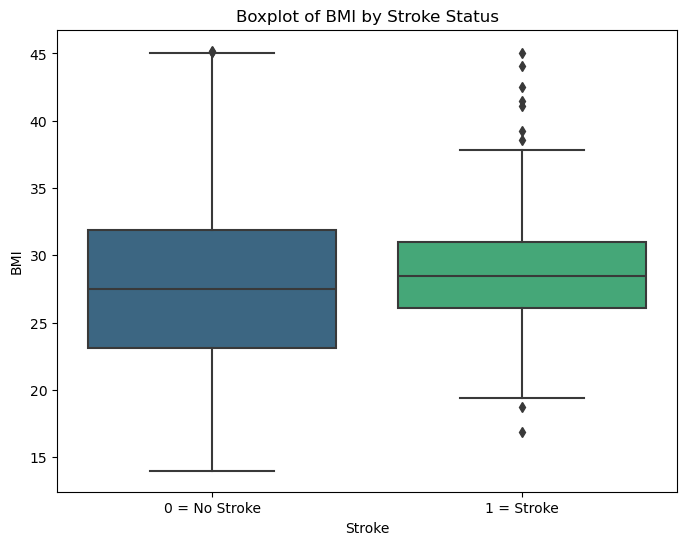

In [60]:
# Adding labels for stroke status on the x-axis or as a legend for clarity

plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='stroke', y='bmi', palette='viridis')
plt.title('Boxplot of BMI by Stroke Status')
plt.xlabel('Stroke')
plt.ylabel('BMI')

# Add custom x-axis labels for Stroke status
plt.xticks([0, 1], ['0 = No Stroke', '1 = Stroke'])

plt.show()


## Model Algorithms : **Random Forest**

### **Data Splitting and Model Building**

Random Forest Accuracy: 0.9508982035928144

Classification Report:
              precision    recall  f1-score   support

           0     0.9641    0.9363    0.9500       832
           1     0.9385    0.9654    0.9518       838

    accuracy                         0.9509      1670
   macro avg     0.9513    0.9508    0.9509      1670
weighted avg     0.9513    0.9509    0.9509      1670

[[779  53]
 [ 29 809]]


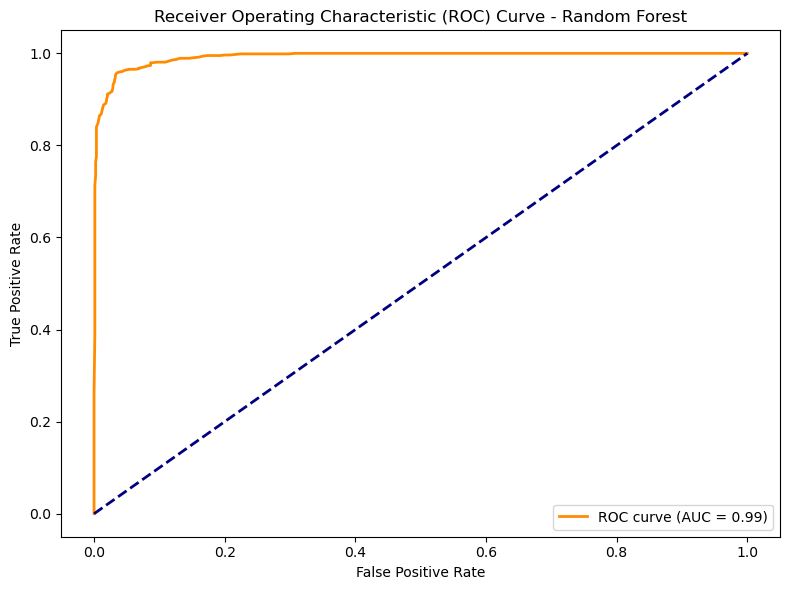

In [69]:
from sklearn.model_selection import train_test_split

# Random Forest Data Split
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)



from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.pipeline import Pipeline

# Create pipeline for Random Forest
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train the model
pipeline_rf.fit(X_train_rf, y_train_rf)

# Make predictions
y_pred_rf = pipeline_rf.predict(X_test_rf)
y_pred_proba_rf = pipeline_rf.predict_proba(X_test_rf)[:, 1]

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test_rf, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test_rf, y_pred_rf,digits=4))

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test_rf, y_pred_rf)
print(conf_matrix_rf)
# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test_rf, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


## Model Algorithms : **XGBoost**

### **Data Splitting and Model Building**

XGBoost Accuracy: 0.9491017964071856

Classification Report:
              precision    recall  f1-score   support

           0     0.9675    0.9291    0.9479       832
           1     0.9323    0.9690    0.9503       838

    accuracy                         0.9491      1670
   macro avg     0.9499    0.9490    0.9491      1670
weighted avg     0.9498    0.9491    0.9491      1670

[[773  59]
 [ 26 812]]


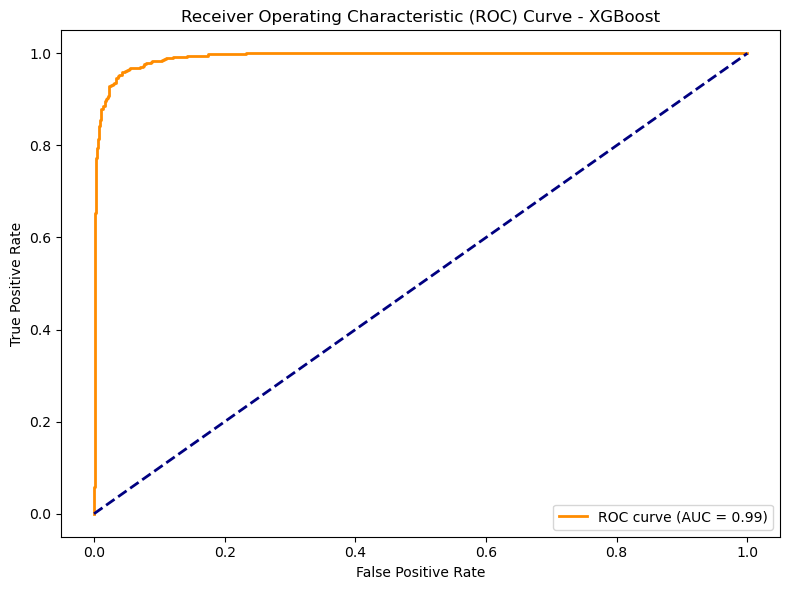

In [70]:
# XGBoost Data Split
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)



from xgboost import XGBClassifier

# Define XGBoost model
model_xgb = XGBClassifier(n_estimators=100, random_state=42)
model_xgb.fit(X_train_xgb, y_train_xgb)

# Make predictions
y_pred_xgb = model_xgb.predict(X_test_xgb)
y_pred_proba_xgb = model_xgb.predict_proba(X_test_xgb)[:, 1]

# Evaluate the model
print("XGBoost Accuracy:", accuracy_score(y_test_xgb, y_pred_xgb))
print("\nClassification Report:")
print(classification_report(y_test_xgb, y_pred_xgb,digits=4))

# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test_xgb, y_pred_xgb)
print(conf_matrix_xgb)

# ROC Curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test_xgb, y_pred_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - XGBoost')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


## Model Algorithms : **Neural Network Model**

---



### **Data Splitting and Model Building**

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.6390 - loss: 0.7359 - val_accuracy: 0.7762 - val_loss: 0.4592
Epoch 2/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7874 - loss: 0.4747 - val_accuracy: 0.8271 - val_loss: 0.3843
Epoch 3/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8129 - loss: 0.4200 - val_accuracy: 0.8338 - val_loss: 0.3650
Epoch 4/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8103 - loss: 0.4176 - val_accuracy: 0.8361 - val_loss: 0.3604
Epoch 5/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8177 - loss: 0.4029 - val_accuracy: 0.8391 - val_loss: 0.3517
Epoch 6/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8162 - loss: 0.3989 - val_accuracy: 0.8458 - val_loss: 0.3475
Epoch 7/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8215 - loss: 0.4070 - val_accuracy: 0.8458 - val_loss: 0.3440
Epoch 8/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8243 - loss: 0.3915 - val_accuracy: 0

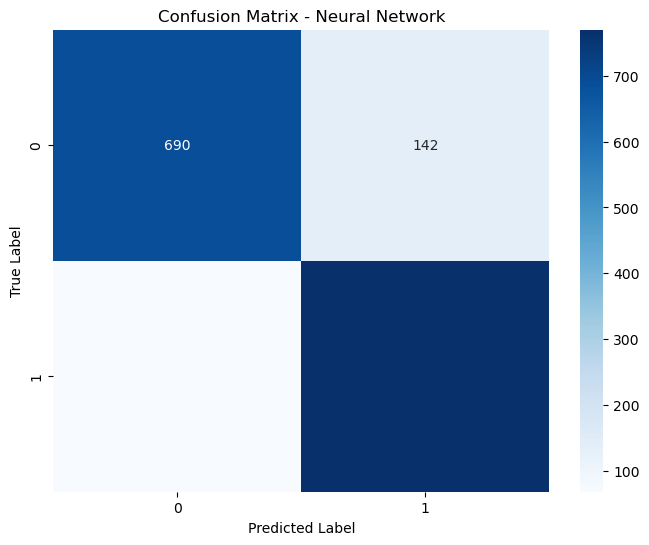

[[690 142]
 [ 68 770]]


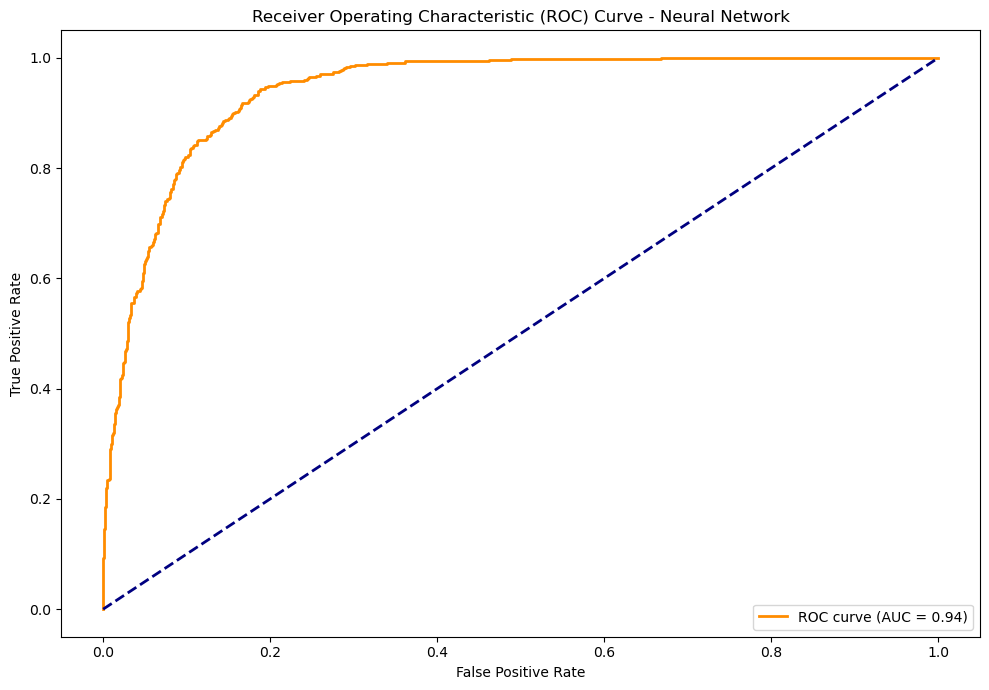

In [68]:
# Neural Network Data Split
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Scale the features
scaler_nn = StandardScaler()
X_train_nn = scaler_nn.fit_transform(X_train_nn)
X_test_nn = scaler_nn.transform(X_test_nn)

# Define the Neural Network model
model_nn = Sequential()
model_nn.add(Dense(64, input_shape=(X_train_nn.shape[1],), activation='relu'))
model_nn.add(BatchNormalization())
model_nn.add(Dropout(0.4))
model_nn.add(Dense(32, activation='relu'))
model_nn.add(BatchNormalization())
model_nn.add(Dropout(0.3))
model_nn.add(Dense(1, activation='sigmoid'))

# Compile the model
model_nn.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
training_history_nn = model_nn.fit(X_train_nn, y_train_nn, epochs=50, batch_size=32, verbose=1, validation_split=0.2, callbacks=[early_stopping])

# Make predictions
y_pred_nn = model_nn.predict(X_test_nn).ravel()
y_pred_nn_class = [1 if i > 0.5 else 0 for i in y_pred_nn]

# Evaluate the model
print("Neural Network Accuracy:", accuracy_score(y_test_nn, y_pred_nn_class))
print("\nClassification Report:")
print(classification_report(y_test_nn, y_pred_nn_class,digits=4))

# Confusion Matrix
conf_matrix_nn = confusion_matrix(y_test_nn, y_pred_nn_class)

print(conf_matrix_nn)
# ROC Curve
fpr_nn, tpr_nn, _ = roc_curve(y_test_nn, y_pred_nn)
roc_auc_nn = auc(fpr_nn, tpr_nn)

plt.figure(figsize=(10, 7))
plt.plot(fpr_nn, tpr_nn, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_nn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Neural Network')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


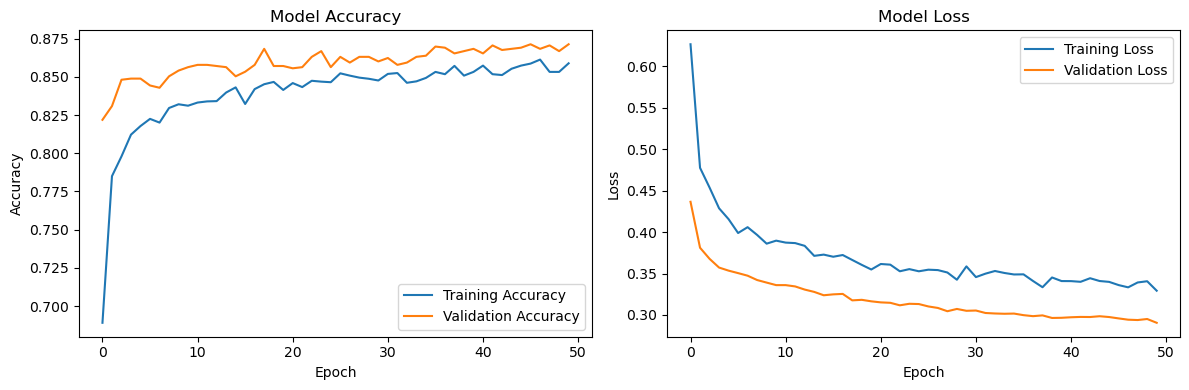

In [65]:
# Training History
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(training_history_nn.history['accuracy'], label='Training Accuracy')
plt.plot(training_history_nn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(training_history_nn.history['loss'], label='Training Loss')
plt.plot(training_history_nn.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

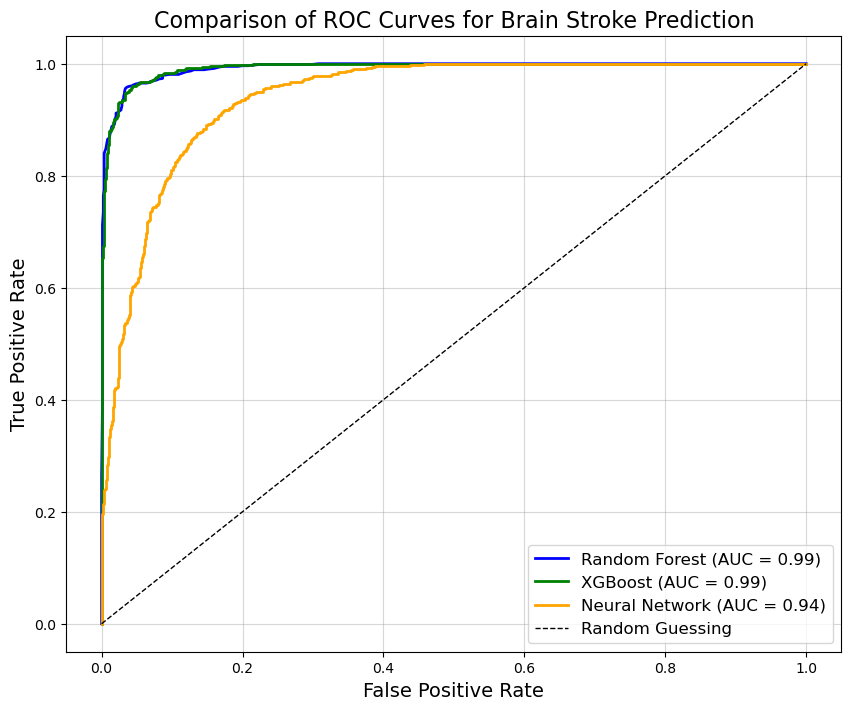

Random Forest AUC: 0.9922
XGBoost AUC: 0.9920
Neural Network AUC: 0.9411


In [66]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Random Forest: ROC and AUC
fpr_rf, tpr_rf, _ = roc_curve(y_test_rf, y_pred_proba_rf)  # Use predicted probabilities for Random Forest
roc_auc_rf = auc(fpr_rf, tpr_rf)

# XGBoost: ROC and AUC
fpr_xgb, tpr_xgb, _ = roc_curve(y_test_xgb, y_pred_proba_xgb)  # Use predicted probabilities for XGBoost
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Neural Network: ROC and AUC
fpr_nn, tpr_nn, _ = roc_curve(y_test_nn, y_pred_nn)  # Use predicted probabilities for Neural Network
roc_auc_nn = auc(fpr_nn, tpr_nn)

# Plot the ROC Curves
plt.figure(figsize=(10, 8))

# Random Forest
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})", lw=2, color='blue')

# XGBoost
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {roc_auc_xgb:.2f})", lw=2, color='green')

# Neural Network
plt.plot(fpr_nn, tpr_nn, label=f"Neural Network (AUC = {roc_auc_nn:.2f})", lw=2, color='orange')

# Reference diagonal line
plt.plot([0, 1], [0, 1], 'k--', lw=1, label="Random Guessing")

# Add labels, legend, and title
plt.title('Comparison of ROC Curves for Brain Stroke Prediction', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.5)

# Show the plot
plt.show()

# Print AUC scores for all models
print(f"Random Forest AUC: {roc_auc_rf:.4f}")
print(f"XGBoost AUC: {roc_auc_xgb:.4f}")
print(f"Neural Network AUC: {roc_auc_nn:.4f}")
